In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import gensim 
from sklearn.datasets import fetch_20newsgroups 
from sklearn.model_selection import train_test_split

In [3]:
#load data
ecomDF = pd.read_csv('Womens_Clothing_E_Commerce_Reviews.csv')
ecomDF

,Index,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


# Descriptive Analysis of Dataset

Text(0.5, 1.0, 'Pie chart for Rating ')

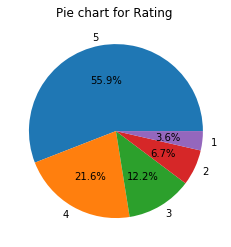

In [117]:
# Rating distribution pie chart
ratingSeries = ecomDF['Rating'].value_counts()
ratingIndex = list(ratingSeries.index)
ratingCount = list(ratingSeries)
plt.pie(ratingCount,labels=ratingIndex,autopct='%1.1f%%')
plt.title('Pie chart for Rating ')

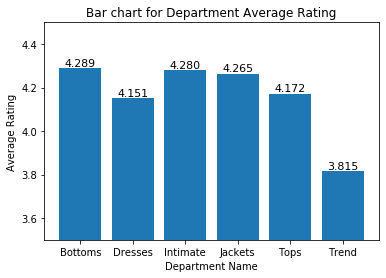

In [118]:
#Average rating of Department bar chart
departmentSeries = ecomDF.groupby('Department Name').Rating.mean()
departmentName = list(departmentSeries.index)
departmentRating = list(departmentSeries)
plt.title('Bar chart for Department Average Rating')
plt.xlabel('Department Name')
plt.ylabel('Average Rating')
plt.ylim(3.5,4.5)
plt.bar(range(len(departmentName)), departmentRating, tick_label=departmentName)
for a, b in zip(range(len(departmentName)), departmentRating):
 plt.text(a, b, '%.3f' % b, ha='center', va='bottom', fontsize=11)

In [8]:
#generate a textlist
review = ecomDF['Review Text']
reviewData = list(review)
reviewData = str(reviewData).replace('\n','')
tokens = nltk.word_tokenize(reviewData)
#all tokens in lower case
lowList = [w.lower() for w in tokens]
#only text tokens
textList = [w for w in lowList if w.isalpha()]

In [9]:
#Remove stop words
myStopWords = stopwords.words('english')
words = [w for w in textList if w not in myStopWords]

In [10]:
nltk.PorterStemmer?

In [12]:
#Generate a list of POS tags
POS_tags = nltk.pos_tag(words)

[('wonderful', 'JJ'),
 ('silky', 'NN'),
 ('sexy', 'NN'),
 ('comfortable', 'JJ'),
 ('dress', 'NN'),
 ('sooo', 'NN'),
 ('pretty', 'RB'),
 ('happened', 'VBD'),
 ('find', 'JJ'),
 ('store', 'NN'),
 ('glad', 'NN'),
 ('bc', 'NN'),
 ('never', 'RB'),
 ('would', 'MD'),
 ('ordered', 'VB'),
 ('online', 'JJ'),
 ('bc', 'NN'),
 ('petite', 'NN'),
 ('bought', 'VBD'),
 ('petite', 'JJ'),
 ('love', 'NN'),
 ('length', 'NN'),
 ('hits', 'VBZ'),
 ('little', 'JJ'),
 ('knee', 'NN'),
 ('would', 'MD'),
 ('definitely', 'RB'),
 ('true', 'JJ'),
 ('midi', 'NN'),
 ('someone', 'NN'),
 ('truly', 'RB'),
 ('petite', 'JJ'),
 ('high', 'JJ'),
 ('hopes', 'NNS'),
 ('dress', 'VBP'),
 ('really', 'RB'),
 ('wanted', 'JJ'),
 ('work', 'NN'),
 ('initially', 'RB'),
 ('ordered', 'VBD'),
 ('petite', 'JJ'),
 ('small', 'JJ'),
 ('usual', 'JJ'),
 ('size', 'NN'),
 ('found', 'VBD'),
 ('outrageously', 'RB'),
 ('small', 'JJ'),
 ('small', 'JJ'),
 ('fact', 'NN'),
 ('could', 'MD'),
 ('zip', 'VB'),
 ('reordered', 'VBN'),
 ('petite', 'JJ'),
 ('mediu

In [13]:
POS_tag_listN = [(word,tag) for (word,tag) in POS_tags if tag.startswith('N')]
#write a file to generate a wordcloud
with open('N_wordcloud.txt', 'w', encoding='UTF8') as cloud:
    for i in POS_tag_listN:
        cloud.write(i[0]+'\n')

# Sentiment analysis of Review Text

In [3]:
#generate sentiment scores
sid = SentimentIntensityAnalyzer()
scoresList = []
for review in ecomDF['Review Text']:
    scores = sid.polarity_scores(str(review))
    scoresList.append(scores)
    print(scores) 

{'neg': 0.0, 'neu': 0.272, 'pos': 0.728, 'compound': 0.8932}
{'neg': 0.0, 'neu': 0.664, 'pos': 0.336, 'compound': 0.9729}
{'neg': 0.027, 'neu': 0.792, 'pos': 0.181, 'compound': 0.9427}
{'neg': 0.226, 'neu': 0.34, 'pos': 0.434, 'compound': 0.5727}
{'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound': 0.9291}
{'neg': 0.0, 'neu': 0.853, 'pos': 0.147, 'compound': 0.9419}
{'neg': 0.023, 'neu': 0.881, 'pos': 0.096, 'compound': 0.8004}
{'neg': 0.046, 'neu': 0.901, 'pos': 0.053, 'compound': -0.0909}
{'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'compound': 0.7175}
{'neg': 0.12, 'neu': 0.753, 'pos': 0.126, 'compound': -0.3724}
{'neg': 0.044, 'neu': 0.877, 'pos': 0.079, 'compound': 0.3578}
{'neg': 0.0, 'neu': 0.319, 'pos': 0.681, 'compound': 0.8927}
{'neg': 0.026, 'neu': 0.899, 'pos': 0.075, 'compound': 0.552}
{'neg': 0.029, 'neu': 0.833, 'pos': 0.138, 'compound': 0.8036}
{'neg': 0.074, 'neu': 0.752, 'pos': 0.174, 'compound': 0.8176}
{'neg': 0.023, 'neu': 0.74, 'pos': 0.237, 'compound': 0.9743}
{'neg': 0.

{'neg': 0.034, 'neu': 0.727, 'pos': 0.239, 'compound': 0.9062}
{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.9528}
{'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'compound': 0.9121}
{'neg': 0.098, 'neu': 0.637, 'pos': 0.264, 'compound': 0.9661}
{'neg': 0.039, 'neu': 0.765, 'pos': 0.196, 'compound': 0.8555}
{'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'compound': 0.9413}
{'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'compound': 0.9134}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.068, 'neu': 0.435, 'pos': 0.497, 'compound': 0.9413}
{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'compound': 0.9217}
{'neg': 0.0, 'neu': 0.844, 'pos': 0.156, 'compound': 0.9508}
{'neg': 0.0, 'neu': 0.501, 'pos': 0.499, 'compound': 0.7165}
{'neg': 0.041, 'neu': 0.793, 'pos': 0.166, 'compound': 0.7817}
{'neg': 0.0, 'neu': 0.651, 'pos': 0.349, 'compound': 0.8934}
{'neg': 0.0, 'neu': 0.624, 'pos': 0.376, 'compound': 0.9882}
{'neg': 0.0, 'neu': 0

{'neg': 0.056, 'neu': 0.567, 'pos': 0.376, 'compound': 0.9886}
{'neg': 0.05, 'neu': 0.821, 'pos': 0.129, 'compound': 0.8036}
{'neg': 0.016, 'neu': 0.899, 'pos': 0.085, 'compound': 0.653}
{'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'compound': 0.6896}
{'neg': 0.0, 'neu': 0.666, 'pos': 0.334, 'compound': 0.8895}
{'neg': 0.0, 'neu': 0.873, 'pos': 0.127, 'compound': 0.6124}
{'neg': 0.072, 'neu': 0.765, 'pos': 0.163, 'compound': 0.8836}
{'neg': 0.0, 'neu': 0.528, 'pos': 0.472, 'compound': 0.9358}
{'neg': 0.0, 'neu': 0.841, 'pos': 0.159, 'compound': 0.7389}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.034, 'neu': 0.789, 'pos': 0.177, 'compound': 0.9398}
{'neg': 0.04, 'neu': 0.839, 'pos': 0.121, 'compound': 0.5255}
{'neg': 0.0, 'neu': 0.913, 'pos': 0.087, 'compound': 0.4144}
{'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'compound': 0.5785}
{'neg': 0.0, 'neu': 0.601, 'pos': 0.399, 'compound': 0.9122}
{'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'compound': 0.9804}
{'neg': 0.022, 'neu': 

{'neg': 0.057, 'neu': 0.774, 'pos': 0.169, 'compound': 0.8705}
{'neg': 0.013, 'neu': 0.74, 'pos': 0.247, 'compound': 0.9572}
{'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'compound': 0.8176}
{'neg': 0.064, 'neu': 0.84, 'pos': 0.097, 'compound': 0.0262}
{'neg': 0.1, 'neu': 0.829, 'pos': 0.07, 'compound': -0.4228}
{'neg': 0.154, 'neu': 0.741, 'pos': 0.105, 'compound': -0.2677}
{'neg': 0.068, 'neu': 0.787, 'pos': 0.145, 'compound': 0.6996}
{'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'compound': 0.9673}
{'neg': 0.047, 'neu': 0.691, 'pos': 0.263, 'compound': 0.8015}
{'neg': 0.024, 'neu': 0.64, 'pos': 0.336, 'compound': 0.9913}
{'neg': 0.043, 'neu': 0.733, 'pos': 0.224, 'compound': 0.9684}
{'neg': 0.064, 'neu': 0.725, 'pos': 0.211, 'compound': 0.9332}
{'neg': 0.0, 'neu': 0.74, 'pos': 0.26, 'compound': 0.8122}
{'neg': 0.049, 'neu': 0.771, 'pos': 0.18, 'compound': 0.8003}
{'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'compound': 0.9633}
{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.8438}
{'neg': 0

{'neg': 0.092, 'neu': 0.883, 'pos': 0.025, 'compound': -0.7296}
{'neg': 0.015, 'neu': 0.886, 'pos': 0.098, 'compound': 0.743}
{'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'compound': 0.9304}
{'neg': 0.043, 'neu': 0.831, 'pos': 0.126, 'compound': 0.7351}
{'neg': 0.128, 'neu': 0.72, 'pos': 0.153, 'compound': 0.0192}
{'neg': 0.0, 'neu': 0.971, 'pos': 0.029, 'compound': 0.2023}
{'neg': 0.041, 'neu': 0.772, 'pos': 0.187, 'compound': 0.8537}
{'neg': 0.0, 'neu': 0.81, 'pos': 0.19, 'compound': 0.9358}
{'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.8957}
{'neg': 0.036, 'neu': 0.809, 'pos': 0.155, 'compound': 0.7534}
{'neg': 0.078, 'neu': 0.858, 'pos': 0.064, 'compound': -0.293}
{'neg': 0.0, 'neu': 0.648, 'pos': 0.352, 'compound': 0.98}
{'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'compound': 0.8619}
{'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'compound': 0.9632}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.041, 'neu': 0.723, 'pos': 0.236, 'compound': 0.6737}
{'neg': 0.036, 'neu'

{'neg': 0.012, 'neu': 0.738, 'pos': 0.25, 'compound': 0.9743}
{'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'compound': 0.9441}
{'neg': 0.029, 'neu': 0.721, 'pos': 0.249, 'compound': 0.9276}
{'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'compound': 0.8354}
{'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'compound': 0.872}
{'neg': 0.041, 'neu': 0.63, 'pos': 0.33, 'compound': 0.9485}
{'neg': 0.0, 'neu': 0.801, 'pos': 0.199, 'compound': 0.8655}
{'neg': 0.068, 'neu': 0.868, 'pos': 0.064, 'compound': -0.3482}
{'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'compound': 0.9676}
{'neg': 0.027, 'neu': 0.704, 'pos': 0.269, 'compound': 0.9301}
{'neg': 0.046, 'neu': 0.785, 'pos': 0.169, 'compound': 0.907}
{'neg': 0.015, 'neu': 0.836, 'pos': 0.149, 'compound': 0.9282}
{'neg': 0.0, 'neu': 0.925, 'pos': 0.075, 'compound': 0.4003}
{'neg': 0.0, 'neu': 0.835, 'pos': 0.165, 'compound': 0.8971}
{'neg': 0.048, 'neu': 0.783, 'pos': 0.168, 'compound': 0.9226}
{'neg': 0.071, 'neu': 0.616, 'pos': 0.313, 'compound': 0.8689}
{'neg': 0.

{'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'compound': 0.9574}
{'neg': 0.032, 'neu': 0.779, 'pos': 0.189, 'compound': 0.9535}
{'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'compound': 0.5563}
{'neg': 0.029, 'neu': 0.708, 'pos': 0.263, 'compound': 0.8978}
{'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'compound': 0.8313}
{'neg': 0.027, 'neu': 0.76, 'pos': 0.213, 'compound': 0.9404}
{'neg': 0.047, 'neu': 0.701, 'pos': 0.251, 'compound': 0.979}
{'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'compound': 0.9671}
{'neg': 0.148, 'neu': 0.676, 'pos': 0.177, 'compound': 0.6709}
{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.9215}
{'neg': 0.064, 'neu': 0.63, 'pos': 0.306, 'compound': 0.9486}
{'neg': 0.037, 'neu': 0.738, 'pos': 0.225, 'compound': 0.9686}
{'neg': 0.026, 'neu': 0.746, 'pos': 0.228, 'compound': 0.9647}
{'neg': 0.0, 'neu': 0.88, 'pos': 0.12, 'compound': 0.6801}
{'neg': 0.106, 'neu': 0.617, 'pos': 0.277, 'compound': 0.9516}
{'neg': 0.041, 'neu': 0.609, 'pos': 0.35, 'compound': 0.9532}
{'neg': 0.

{'neg': 0.0, 'neu': 0.733, 'pos': 0.267, 'compound': 0.9305}
{'neg': 0.084, 'neu': 0.721, 'pos': 0.195, 'compound': 0.9061}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.045, 'neu': 0.84, 'pos': 0.116, 'compound': 0.5859}
{'neg': 0.031, 'neu': 0.801, 'pos': 0.168, 'compound': 0.9382}
{'neg': 0.068, 'neu': 0.806, 'pos': 0.126, 'compound': 0.611}
{'neg': 0.0, 'neu': 0.62, 'pos': 0.38, 'compound': 0.9698}
{'neg': 0.0, 'neu': 0.883, 'pos': 0.117, 'compound': 0.6915}
{'neg': 0.018, 'neu': 0.727, 'pos': 0.255, 'compound': 0.983}
{'neg': 0.095, 'neu': 0.553, 'pos': 0.352, 'compound': 0.9406}
{'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'compound': 0.9415}
{'neg': 0.09, 'neu': 0.704, 'pos': 0.207, 'compound': 0.7168}
{'neg': 0.0, 'neu': 0.744, 'pos': 0.256, 'compound': 0.705}
{'neg': 0.104, 'neu': 0.783, 'pos': 0.113, 'compound': -0.0727}
{'neg': 0.102, 'neu': 0.762, 'pos': 0.136, 'compound': 0.2382}
{'neg': 0.0, 'neu': 0.813, 'pos': 0.187, 'compound': 0.9523}
{'neg': 0.101, 'neu

{'neg': 0.0, 'neu': 0.644, 'pos': 0.356, 'compound': 0.9245}
{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'compound': 0.9565}
{'neg': 0.021, 'neu': 0.849, 'pos': 0.129, 'compound': 0.9042}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.026, 'neu': 0.802, 'pos': 0.172, 'compound': 0.9136}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.044, 'neu': 0.735, 'pos': 0.221, 'compound': 0.9691}
{'neg': 0.053, 'neu': 0.745, 'pos': 0.203, 'compound': 0.9286}
{'neg': 0.02, 'neu': 0.73, 'pos': 0.25, 'compound': 0.973}
{'neg': 0.0, 'neu': 0.567, 'pos': 0.433, 'compound': 0.8553}
{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.743}
{'neg': 0.0, 'neu': 0.744, 'pos': 0.256, 'compound': 0.9731}
{'neg': 0.028, 'neu': 0.767, 'pos': 0.205, 'compound': 0.9201}
{'neg': 0.0, 'neu': 0.795, 'pos': 0.205, 'compound': 0.9359}
{'neg': 0.149, 'neu': 0.522, 'pos': 0.329, 'compound': 0.5413}
{'neg': 0.025, 'neu': 0.861, 'pos': 0.115, 'compound': 0.8684}
{'neg': 0.021, 'neu': 0.877

{'neg': 0.036, 'neu': 0.79, 'pos': 0.174, 'compound': 0.7606}
{'neg': 0.021, 'neu': 0.67, 'pos': 0.31, 'compound': 0.9664}
{'neg': 0.149, 'neu': 0.495, 'pos': 0.356, 'compound': 0.7826}
{'neg': 0.108, 'neu': 0.639, 'pos': 0.254, 'compound': 0.8192}
{'neg': 0.0, 'neu': 0.683, 'pos': 0.317, 'compound': 0.9115}
{'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'compound': 0.9892}
{'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'compound': 0.9643}
{'neg': 0.112, 'neu': 0.619, 'pos': 0.268, 'compound': 0.7791}
{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'compound': 0.605}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'compound': 0.8922}
{'neg': 0.142, 'neu': 0.756, 'pos': 0.102, 'compound': -0.584}
{'neg': 0.0, 'neu': 0.669, 'pos': 0.331, 'compound': 0.9537}
{'neg': 0.101, 'neu': 0.661, 'pos': 0.239, 'compound': 0.8922}
{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'compound': 0.7145}
{'neg': 0.065, 'neu': 0.75, 'pos': 0.185, 'compound': 0.8452}
{'neg': 0.0, 'neu': 

{'neg': 0.0, 'neu': 0.944, 'pos': 0.056, 'compound': 0.4102}
{'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'compound': 0.9767}
{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'compound': 0.9638}
{'neg': 0.082, 'neu': 0.876, 'pos': 0.041, 'compound': -0.499}
{'neg': 0.032, 'neu': 0.703, 'pos': 0.265, 'compound': 0.9773}
{'neg': 0.0, 'neu': 0.924, 'pos': 0.076, 'compound': 0.8066}
{'neg': 0.0, 'neu': 0.858, 'pos': 0.142, 'compound': 0.8286}
{'neg': 0.155, 'neu': 0.791, 'pos': 0.054, 'compound': -0.8004}
{'neg': 0.031, 'neu': 0.743, 'pos': 0.227, 'compound': 0.9255}
{'neg': 0.043, 'neu': 0.736, 'pos': 0.221, 'compound': 0.8652}
{'neg': 0.0, 'neu': 0.715, 'pos': 0.285, 'compound': 0.8796}
{'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'compound': 0.9655}
{'neg': 0.0, 'neu': 0.795, 'pos': 0.205, 'compound': 0.9656}
{'neg': 0.0, 'neu': 0.735, 'pos': 0.265, 'compound': 0.9382}
{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.7757}
{'neg': 0.056, 'neu': 0.759, 'pos': 0.185, 'compound': 0.8858}
{'neg': 0.033

{'neg': 0.06, 'neu': 0.703, 'pos': 0.237, 'compound': 0.9542}
{'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'compound': 0.872}
{'neg': 0.0, 'neu': 0.532, 'pos': 0.468, 'compound': 0.8646}
{'neg': 0.0, 'neu': 0.635, 'pos': 0.365, 'compound': 0.9524}
{'neg': 0.028, 'neu': 0.731, 'pos': 0.241, 'compound': 0.962}
{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.8591}
{'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.91}
{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.79}
{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'compound': 0.8479}
{'neg': 0.0, 'neu': 0.518, 'pos': 0.482, 'compound': 0.9323}
{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.9769}
{'neg': 0.074, 'neu': 0.826, 'pos': 0.1, 'compound': 0.1398}
{'neg': 0.0, 'neu': 0.747, 'pos': 0.253, 'compound': 0.982}
{'neg': 0.0, 'neu': 0.754, 'pos': 0.246, 'compound': 0.9327}
{'neg': 0.0, 'neu': 0.739, 'pos': 0.261, 'compound': 0.9583}
{'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compound': 0.9039}
{'neg': 0.062, 'neu': 0.779, '

{'neg': 0.035, 'neu': 0.805, 'pos': 0.16, 'compound': 0.8268}
{'neg': 0.018, 'neu': 0.839, 'pos': 0.143, 'compound': 0.8728}
{'neg': 0.029, 'neu': 0.798, 'pos': 0.173, 'compound': 0.9021}
{'neg': 0.0, 'neu': 0.54, 'pos': 0.46, 'compound': 0.9625}
{'neg': 0.0, 'neu': 0.544, 'pos': 0.456, 'compound': 0.9484}
{'neg': 0.063, 'neu': 0.868, 'pos': 0.069, 'compound': 0.3685}
{'neg': 0.0, 'neu': 0.641, 'pos': 0.359, 'compound': 0.6808}
{'neg': 0.066, 'neu': 0.673, 'pos': 0.262, 'compound': 0.9467}
{'neg': 0.022, 'neu': 0.704, 'pos': 0.273, 'compound': 0.9695}
{'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.8521}
{'neg': 0.031, 'neu': 0.771, 'pos': 0.198, 'compound': 0.8357}
{'neg': 0.027, 'neu': 0.746, 'pos': 0.227, 'compound': 0.9676}
{'neg': 0.0, 'neu': 0.744, 'pos': 0.256, 'compound': 0.705}
{'neg': 0.0, 'neu': 0.83, 'pos': 0.17, 'compound': 0.2609}
{'neg': 0.026, 'neu': 0.883, 'pos': 0.091, 'compound': 0.5263}
{'neg': 0.0, 'neu': 0.757, 'pos': 0.243, 'compound': 0.9635}
{'neg': 0.0

{'neg': 0.042, 'neu': 0.619, 'pos': 0.339, 'compound': 0.9467}
{'neg': 0.018, 'neu': 0.593, 'pos': 0.39, 'compound': 0.9858}
{'neg': 0.0, 'neu': 0.712, 'pos': 0.288, 'compound': 0.9583}
{'neg': 0.0, 'neu': 0.626, 'pos': 0.374, 'compound': 0.9444}
{'neg': 0.0, 'neu': 0.511, 'pos': 0.489, 'compound': 0.9531}
{'neg': 0.0, 'neu': 0.324, 'pos': 0.676, 'compound': 0.9493}
{'neg': 0.095, 'neu': 0.716, 'pos': 0.189, 'compound': 0.746}
{'neg': 0.013, 'neu': 0.77, 'pos': 0.217, 'compound': 0.9597}
{'neg': 0.0, 'neu': 0.644, 'pos': 0.356, 'compound': 0.938}
{'neg': 0.0, 'neu': 0.903, 'pos': 0.097, 'compound': 0.7086}
{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.8807}
{'neg': 0.0, 'neu': 0.683, 'pos': 0.317, 'compound': 0.9786}
{'neg': 0.111, 'neu': 0.708, 'pos': 0.181, 'compound': 0.7351}
{'neg': 0.0, 'neu': 0.665, 'pos': 0.335, 'compound': 0.9889}
{'neg': 0.052, 'neu': 0.656, 'pos': 0.292, 'compound': 0.9809}
{'neg': 0.027, 'neu': 0.947, 'pos': 0.026, 'compound': -0.0284}
{'neg': 0.033

{'neg': 0.066, 'neu': 0.79, 'pos': 0.144, 'compound': 0.5651}
{'neg': 0.024, 'neu': 0.77, 'pos': 0.205, 'compound': 0.9259}
{'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'compound': 0.9061}
{'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'compound': 0.9182}
{'neg': 0.094, 'neu': 0.759, 'pos': 0.147, 'compound': 0.4219}
{'neg': 0.034, 'neu': 0.65, 'pos': 0.315, 'compound': 0.9458}
{'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'compound': 0.9589}
{'neg': 0.116, 'neu': 0.8, 'pos': 0.084, 'compound': -0.3818}
{'neg': 0.088, 'neu': 0.72, 'pos': 0.191, 'compound': 0.555}
{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'compound': 0.7809}
{'neg': 0.0, 'neu': 0.668, 'pos': 0.332, 'compound': 0.9245}
{'neg': 0.0, 'neu': 0.733, 'pos': 0.267, 'compound': 0.9184}
{'neg': 0.057, 'neu': 0.823, 'pos': 0.12, 'compound': 0.6546}
{'neg': 0.018, 'neu': 0.805, 'pos': 0.178, 'compound': 0.9206}
{'neg': 0.0, 'neu': 0.905, 'pos': 0.095, 'compound': 0.8381}
{'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'compound': 0.9869}
{'neg': 0.036, 

{'neg': 0.077, 'neu': 0.835, 'pos': 0.089, 'compound': 0.3023}
{'neg': 0.019, 'neu': 0.826, 'pos': 0.155, 'compound': 0.8843}
{'neg': 0.019, 'neu': 0.827, 'pos': 0.154, 'compound': 0.8734}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.049, 'neu': 0.788, 'pos': 0.162, 'compound': 0.6795}
{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'compound': 0.5106}
{'neg': 0.055, 'neu': 0.642, 'pos': 0.303, 'compound': 0.9788}
{'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'compound': 0.6249}
{'neg': 0.069, 'neu': 0.777, 'pos': 0.155, 'compound': 0.8564}
{'neg': 0.087, 'neu': 0.566, 'pos': 0.347, 'compound': 0.9883}
{'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.5574}
{'neg': 0.0, 'neu': 0.835, 'pos': 0.165, 'compound': 0.7108}
{'neg': 0.017, 'neu': 0.703, 'pos': 0.28, 'compound': 0.9815}
{'neg': 0.064, 'neu': 0.783, 'pos': 0.153, 'compound': 0.7419}
{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.9186}
{'neg': 0.0, 'neu': 0.831, 'pos': 0.169, 'compound': 0.8746}
{'neg': 0.0, '

{'neg': 0.0, 'neu': 0.592, 'pos': 0.408, 'compound': 0.938}
{'neg': 0.09, 'neu': 0.668, 'pos': 0.243, 'compound': 0.9088}
{'neg': 0.16, 'neu': 0.797, 'pos': 0.042, 'compound': -0.8999}
{'neg': 0.134, 'neu': 0.758, 'pos': 0.109, 'compound': -0.128}
{'neg': 0.047, 'neu': 0.862, 'pos': 0.092, 'compound': 0.6172}
{'neg': 0.056, 'neu': 0.782, 'pos': 0.162, 'compound': 0.8244}
{'neg': 0.0, 'neu': 0.744, 'pos': 0.256, 'compound': 0.9199}
{'neg': 0.0, 'neu': 0.867, 'pos': 0.133, 'compound': 0.5346}
{'neg': 0.147, 'neu': 0.616, 'pos': 0.237, 'compound': 0.9067}
{'neg': 0.041, 'neu': 0.855, 'pos': 0.104, 'compound': 0.571}
{'neg': 0.058, 'neu': 0.567, 'pos': 0.376, 'compound': 0.9504}
{'neg': 0.037, 'neu': 0.816, 'pos': 0.146, 'compound': 0.8205}
{'neg': 0.011, 'neu': 0.726, 'pos': 0.263, 'compound': 0.9837}
{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'compound': 0.9658}
{'neg': 0.047, 'neu': 0.788, 'pos': 0.165, 'compound': 0.8885}
{'neg': 0.117, 'neu': 0.643, 'pos': 0.241, 'compound': 0.8095}
{'n

{'neg': 0.035, 'neu': 0.81, 'pos': 0.155, 'compound': 0.9118}
{'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'compound': 0.8225}
{'neg': 0.06, 'neu': 0.66, 'pos': 0.28, 'compound': 0.9538}
{'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compound': 0.4012}
{'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'compound': 0.9562}
{'neg': 0.076, 'neu': 0.709, 'pos': 0.216, 'compound': 0.8442}
{'neg': 0.0, 'neu': 0.67, 'pos': 0.33, 'compound': 0.9768}
{'neg': 0.092, 'neu': 0.766, 'pos': 0.142, 'compound': 0.6767}
{'neg': 0.0, 'neu': 0.801, 'pos': 0.199, 'compound': 0.9421}
{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'compound': 0.9053}
{'neg': 0.0, 'neu': 0.565, 'pos': 0.435, 'compound': 0.9638}
{'neg': 0.0, 'neu': 0.381, 'pos': 0.619, 'compound': 0.9078}
{'neg': 0.142, 'neu': 0.811, 'pos': 0.047, 'compound': -0.6908}
{'neg': 0.068, 'neu': 0.603, 'pos': 0.329, 'compound': 0.8601}
{'neg': 0.058, 'neu': 0.577, 'pos': 0.366, 'compound': 0.9524}
{'neg': 0.0, 'neu': 0.616, 'pos': 0.384, 'compound': 0.9392}
{'neg': 0.0, 'neu

{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.7227}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'compound': 0.9371}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.04, 'neu': 0.691, 'pos': 0.269, 'compound': 0.9786}
{'neg': 0.038, 'neu': 0.809, 'pos': 0.153, 'compound': 0.9149}
{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.9597}
{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'compound': 0.9669}
{'neg': 0.0, 'neu': 0.67, 'pos': 0.33, 'compound': 0.9707}
{'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'compound': 0.7947}
{'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'compound': 0.8169}
{'neg': 0.037, 'neu': 0.739, 'pos': 0.224, 'compound': 0.9497}
{'neg': 0.049, 'neu': 0.719, 'pos': 0.232, 'compound': 0.9518}
{'neg': 0.0, 'neu': 0.74, 'pos': 0.26, 'compound': 0.9689}
{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'compound': 0.964}
{'neg': 0.099, 'neu': 0.721, 'pos': 0.18, 'compound': 0.8361}
{'neg': 0.032, 'neu': 0.735, 'pos':

{'neg': 0.0, 'neu': 0.63, 'pos': 0.37, 'compound': 0.6478}
{'neg': 0.079, 'neu': 0.504, 'pos': 0.417, 'compound': 0.9687}
{'neg': 0.0, 'neu': 0.436, 'pos': 0.564, 'compound': 0.9122}
{'neg': 0.0, 'neu': 0.651, 'pos': 0.349, 'compound': 0.8442}
{'neg': 0.035, 'neu': 0.743, 'pos': 0.223, 'compound': 0.9168}
{'neg': 0.026, 'neu': 0.742, 'pos': 0.232, 'compound': 0.9398}
{'neg': 0.063, 'neu': 0.805, 'pos': 0.132, 'compound': 0.5991}
{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.6908}
{'neg': 0.015, 'neu': 0.797, 'pos': 0.188, 'compound': 0.942}
{'neg': 0.036, 'neu': 0.781, 'pos': 0.183, 'compound': 0.7096}
{'neg': 0.024, 'neu': 0.879, 'pos': 0.097, 'compound': 0.7649}
{'neg': 0.019, 'neu': 0.861, 'pos': 0.12, 'compound': 0.8476}
{'neg': 0.123, 'neu': 0.72, 'pos': 0.157, 'compound': -0.2165}
{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.7311}
{'neg': 0.2, 'neu': 0.668, 'pos': 0.132, 'compound': -0.8133}
{'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compound': 0.6369}
{'neg': 0.0

{'neg': 0.023, 'neu': 0.903, 'pos': 0.074, 'compound': 0.5647}
{'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'compound': 0.9633}
{'neg': 0.036, 'neu': 0.864, 'pos': 0.1, 'compound': 0.8068}
{'neg': 0.049, 'neu': 0.857, 'pos': 0.094, 'compound': 0.3802}
{'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'compound': 0.9724}
{'neg': 0.018, 'neu': 0.681, 'pos': 0.3, 'compound': 0.9847}
{'neg': 0.0, 'neu': 0.558, 'pos': 0.442, 'compound': 0.8834}
{'neg': 0.042, 'neu': 0.9, 'pos': 0.058, 'compound': 0.3804}
{'neg': 0.067, 'neu': 0.733, 'pos': 0.2, 'compound': 0.95}
{'neg': 0.046, 'neu': 0.621, 'pos': 0.334, 'compound': 0.9565}
{'neg': 0.046, 'neu': 0.661, 'pos': 0.293, 'compound': 0.9555}
{'neg': 0.037, 'neu': 0.731, 'pos': 0.232, 'compound': 0.9091}
{'neg': 0.0, 'neu': 0.877, 'pos': 0.123, 'compound': 0.5785}
{'neg': 0.026, 'neu': 0.683, 'pos': 0.29, 'compound': 0.9847}
{'neg': 0.033, 'neu': 0.921, 'pos': 0.046, 'compound': 0.1779}
{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.8668}
{'neg': 0.0, 

{'neg': 0.039, 'neu': 0.679, 'pos': 0.282, 'compound': 0.9479}
{'neg': 0.02, 'neu': 0.725, 'pos': 0.256, 'compound': 0.9487}
{'neg': 0.077, 'neu': 0.752, 'pos': 0.171, 'compound': 0.7512}
{'neg': 0.032, 'neu': 0.726, 'pos': 0.241, 'compound': 0.9319}
{'neg': 0.0, 'neu': 0.935, 'pos': 0.065, 'compound': 0.5023}
{'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'compound': 0.9278}
{'neg': 0.0, 'neu': 0.522, 'pos': 0.478, 'compound': 0.9477}
{'neg': 0.041, 'neu': 0.644, 'pos': 0.315, 'compound': 0.9348}
{'neg': 0.097, 'neu': 0.734, 'pos': 0.169, 'compound': 0.637}
{'neg': 0.108, 'neu': 0.667, 'pos': 0.225, 'compound': 0.9141}
{'neg': 0.026, 'neu': 0.676, 'pos': 0.298, 'compound': 0.9337}
{'neg': 0.024, 'neu': 0.83, 'pos': 0.146, 'compound': 0.9106}
{'neg': 0.015, 'neu': 0.691, 'pos': 0.293, 'compound': 0.9742}
{'neg': 0.111, 'neu': 0.765, 'pos': 0.124, 'compound': 0.1045}
{'neg': 0.036, 'neu': 0.746, 'pos': 0.218, 'compound': 0.9022}
{'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'compound': 0.8805}
{'n

{'neg': 0.078, 'neu': 0.772, 'pos': 0.15, 'compound': 0.6706}
{'neg': 0.0, 'neu': 0.407, 'pos': 0.593, 'compound': 0.9392}
{'neg': 0.031, 'neu': 0.522, 'pos': 0.447, 'compound': 0.9832}
{'neg': 0.0, 'neu': 0.795, 'pos': 0.205, 'compound': 0.8832}
{'neg': 0.069, 'neu': 0.88, 'pos': 0.05, 'compound': -0.1815}
{'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'compound': 0.9539}
{'neg': 0.059, 'neu': 0.485, 'pos': 0.456, 'compound': 0.9407}
{'neg': 0.07, 'neu': 0.641, 'pos': 0.289, 'compound': 0.9729}
{'neg': 0.035, 'neu': 0.846, 'pos': 0.119, 'compound': 0.7675}
{'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'compound': 0.9403}
{'neg': 0.028, 'neu': 0.724, 'pos': 0.247, 'compound': 0.8975}
{'neg': 0.2, 'neu': 0.732, 'pos': 0.068, 'compound': -0.5113}
{'neg': 0.045, 'neu': 0.671, 'pos': 0.284, 'compound': 0.9488}
{'neg': 0.136, 'neu': 0.787, 'pos': 0.077, 'compound': -0.631}
{'neg': 0.103, 'neu': 0.805, 'pos': 0.092, 'compound': 0.325}
{'neg': 0.0, 'neu': 0.653, 'pos': 0.347, 'compound': 0.9432}
{'neg':

{'neg': 0.014, 'neu': 0.747, 'pos': 0.239, 'compound': 0.9633}
{'neg': 0.1, 'neu': 0.611, 'pos': 0.289, 'compound': 0.813}
{'neg': 0.062, 'neu': 0.615, 'pos': 0.323, 'compound': 0.9043}
{'neg': 0.027, 'neu': 0.849, 'pos': 0.123, 'compound': 0.8588}
{'neg': 0.0, 'neu': 0.39, 'pos': 0.61, 'compound': 0.9735}
{'neg': 0.0, 'neu': 0.95, 'pos': 0.05, 'compound': 0.4019}
{'neg': 0.0, 'neu': 0.616, 'pos': 0.384, 'compound': 0.9666}
{'neg': 0.035, 'neu': 0.891, 'pos': 0.074, 'compound': 0.6}
{'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'compound': 0.831}
{'neg': 0.082, 'neu': 0.804, 'pos': 0.113, 'compound': 0.125}
{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'compound': 0.9514}
{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.8245}
{'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'compound': 0.9069}
{'neg': 0.066, 'neu': 0.776, 'pos': 0.159, 'compound': 0.8346}
{'neg': 0.056, 'neu': 0.901, 'pos': 0.042, 'compound': -0.2023}
{'neg': 0.0, 'neu': 0.898, 'pos': 0.102, 'compound': 0.8393}
{'neg': 0.0, 'neu': 0

{'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'compound': 0.7743}
{'neg': 0.0, 'neu': 0.598, 'pos': 0.402, 'compound': 0.902}
{'neg': 0.0, 'neu': 0.568, 'pos': 0.432, 'compound': 0.886}
{'neg': 0.021, 'neu': 0.721, 'pos': 0.258, 'compound': 0.9816}
{'neg': 0.054, 'neu': 0.698, 'pos': 0.248, 'compound': 0.9429}
{'neg': 0.065, 'neu': 0.846, 'pos': 0.088, 'compound': 0.1511}
{'neg': 0.073, 'neu': 0.822, 'pos': 0.104, 'compound': 0.6329}
{'neg': 0.0, 'neu': 0.832, 'pos': 0.168, 'compound': 0.7945}
{'neg': 0.058, 'neu': 0.784, 'pos': 0.159, 'compound': 0.7924}
{'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'compound': 0.9107}
{'neg': 0.0, 'neu': 0.972, 'pos': 0.028, 'compound': 0.4019}
{'neg': 0.0, 'neu': 0.67, 'pos': 0.33, 'compound': 0.7506}
{'neg': 0.056, 'neu': 0.614, 'pos': 0.33, 'compound': 0.9822}
{'neg': 0.0, 'neu': 0.548, 'pos': 0.452, 'compound': 0.9583}
{'neg': 0.029, 'neu': 0.604, 'pos': 0.367, 'compound': 0.9747}
{'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.9467}
{'neg': 0.092, 

{'neg': 0.031, 'neu': 0.708, 'pos': 0.26, 'compound': 0.9832}
{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.906}
{'neg': 0.045, 'neu': 0.819, 'pos': 0.135, 'compound': 0.8617}
{'neg': 0.0, 'neu': 0.76, 'pos': 0.24, 'compound': 0.6249}
{'neg': 0.097, 'neu': 0.721, 'pos': 0.182, 'compound': 0.8858}
{'neg': 0.12, 'neu': 0.787, 'pos': 0.093, 'compound': -0.3079}
{'neg': 0.059, 'neu': 0.703, 'pos': 0.238, 'compound': 0.9722}
{'neg': 0.026, 'neu': 0.832, 'pos': 0.142, 'compound': 0.7972}
{'neg': 0.05, 'neu': 0.742, 'pos': 0.207, 'compound': 0.9345}
{'neg': 0.067, 'neu': 0.673, 'pos': 0.261, 'compound': 0.9777}
{'neg': 0.0, 'neu': 0.78, 'pos': 0.22, 'compound': 0.9578}
{'neg': 0.035, 'neu': 0.765, 'pos': 0.2, 'compound': 0.9083}
{'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'compound': 0.765}
{'neg': 0.0, 'neu': 0.911, 'pos': 0.089, 'compound': 0.1901}
{'neg': 0.063, 'neu': 0.727, 'pos': 0.211, 'compound': 0.9523}
{'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.9741}
{'neg': 0.0, 'ne

{'neg': 0.063, 'neu': 0.779, 'pos': 0.158, 'compound': 0.8534}
{'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'compound': 0.9758}
{'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'compound': 0.7845}
{'neg': 0.032, 'neu': 0.784, 'pos': 0.184, 'compound': 0.7607}
{'neg': 0.0, 'neu': 0.523, 'pos': 0.477, 'compound': 0.8481}
{'neg': 0.0, 'neu': 0.445, 'pos': 0.555, 'compound': 0.9287}
{'neg': 0.039, 'neu': 0.61, 'pos': 0.35, 'compound': 0.9412}
{'neg': 0.0, 'neu': 0.712, 'pos': 0.288, 'compound': 0.9513}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.8369}
{'neg': 0.0, 'neu': 0.632, 'pos': 0.368, 'compound': 0.9696}
{'neg': 0.044, 'neu': 0.508, 'pos': 0.448, 'compound': 0.9924}
{'neg': 0.072, 'neu': 0.543, 'pos': 0.385, 'compound': 0.9373}
{'neg': 0.065, 'neu': 0.833, 'pos': 0.101, 'compound': 0.5602}
{'neg': 0.0, 'neu': 0.726, 'pos': 0.274, 'compound': 0.9022}
{'neg': 0.119, 'neu': 0.642, 'pos': 0.239, 'compound': 0.5211}
{'neg': 0.0, 'neu':

{'neg': 0.0, 'neu': 0.59, 'pos': 0.41, 'compound': 0.976}
{'neg': 0.037, 'neu': 0.824, 'pos': 0.139, 'compound': 0.8773}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'compound': 0.9538}
{'neg': 0.0, 'neu': 0.49, 'pos': 0.51, 'compound': 0.9625}
{'neg': 0.0, 'neu': 0.751, 'pos': 0.249, 'compound': 0.9595}
{'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'compound': 0.9821}
{'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'compound': 0.624}
{'neg': 0.048, 'neu': 0.681, 'pos': 0.271, 'compound': 0.9797}
{'neg': 0.05, 'neu': 0.767, 'pos': 0.183, 'compound': 0.8359}
{'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'compound': 0.6249}
{'neg': 0.0, 'neu': 0.943, 'pos': 0.057, 'compound': 0.4678}
{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.9659}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.036, 'neu': 0.709, 'pos': 0.255, 'compound': 0.9129}
{'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'co

{'neg': 0.0, 'neu': 0.523, 'pos': 0.477, 'compound': 0.8066}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.019, 'neu': 0.673, 'pos': 0.308, 'compound': 0.961}
{'neg': 0.096, 'neu': 0.716, 'pos': 0.188, 'compound': 0.876}
{'neg': 0.084, 'neu': 0.753, 'pos': 0.163, 'compound': 0.2266}
{'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'compound': 0.9465}
{'neg': 0.035, 'neu': 0.813, 'pos': 0.152, 'compound': 0.9012}
{'neg': 0.028, 'neu': 0.612, 'pos': 0.36, 'compound': 0.9334}
{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.9108}
{'neg': 0.021, 'neu': 0.867, 'pos': 0.112, 'compound': 0.8748}
{'neg': 0.105, 'neu': 0.723, 'pos': 0.172, 'compound': 0.5569}
{'neg': 0.027, 'neu': 0.856, 'pos': 0.117, 'compound': 0.8165}
{'neg': 0.024, 'neu': 0.835, 'pos': 0.141, 'compound': 0.8098}
{'neg': 0.051, 'neu': 0.812, 'pos': 0.137, 'compound': 0.5296}
{'neg': 0.117, 'neu': 0.72, 'pos': 0.163, 'compound': 0.693}
{'neg': 0.149, 'neu': 0.741, 'pos': 0.11, 'compound': -0.4686}
{'neg': 0.0,

{'neg': 0.0, 'neu': 0.679, 'pos': 0.321, 'compound': 0.9784}
{'neg': 0.0, 'neu': 0.751, 'pos': 0.249, 'compound': 0.9796}
{'neg': 0.0, 'neu': 0.858, 'pos': 0.142, 'compound': 0.9122}
{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.9012}
{'neg': 0.11, 'neu': 0.712, 'pos': 0.178, 'compound': 0.0507}
{'neg': 0.065, 'neu': 0.687, 'pos': 0.247, 'compound': 0.9679}
{'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'compound': 0.6542}
{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.9509}
{'neg': 0.0, 'neu': 0.327, 'pos': 0.673, 'compound': 0.9768}
{'neg': 0.024, 'neu': 0.634, 'pos': 0.342, 'compound': 0.9778}
{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9294}
{'neg': 0.097, 'neu': 0.747, 'pos': 0.156, 'compound': 0.5141}
{'neg': 0.042, 'neu': 0.697, 'pos': 0.261, 'compound': 0.9794}
{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'compound': 0.975}
{'neg': 0.022, 'neu': 0.708, 'pos': 0.269, 'compound': 0.9862}
{'neg': 0.112, 'neu': 0.748, 'pos': 0.14, 'compound': 0.3802}
{'neg': 0.069

{'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'compound': 0.972}
{'neg': 0.039, 'neu': 0.596, 'pos': 0.365, 'compound': 0.9703}
{'neg': 0.079, 'neu': 0.814, 'pos': 0.107, 'compound': 0.3924}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.799, 'pos': 0.201, 'compound': 0.9304}
{'neg': 0.0, 'neu': 0.691, 'pos': 0.309, 'compound': 0.9864}
{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'compound': 0.7954}
{'neg': 0.078, 'neu': 0.769, 'pos': 0.153, 'compound': 0.87}
{'neg': 0.047, 'neu': 0.712, 'pos': 0.242, 'compound': 0.9438}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.096, 'neu': 0.696, 'pos': 0.208, 'compound': 0.7294}
{'neg': 0.048, 'neu': 0.819, 'pos': 0.133, 'compound': 0.8568}
{'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'compound': 0.9332}
{'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.9551}
{'neg': 0.022, 'neu': 0.736, 'pos': 0.242, 'compound': 0.9649}
{'neg': 0.0, 'neu': 0.568, 'pos': 0.432, 'compound': 0.9533}
{'neg': 0.055, 'neu': 0.718

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.022, 'neu': 0.818, 'pos': 0.161, 'compound': 0.8909}
{'neg': 0.033, 'neu': 0.801, 'pos': 0.166, 'compound': 0.7783}
{'neg': 0.046, 'neu': 0.733, 'pos': 0.221, 'compound': 0.927}
{'neg': 0.099, 'neu': 0.751, 'pos': 0.15, 'compound': 0.3434}
{'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'compound': 0.8748}
{'neg': 0.0, 'neu': 0.337, 'pos': 0.663, 'compound': 0.9299}
{'neg': 0.089, 'neu': 0.765, 'pos': 0.146, 'compound': 0.3197}
{'neg': 0.0, 'neu': 0.846, 'pos': 0.154, 'compound': 0.25}
{'neg': 0.097, 'neu': 0.763, 'pos': 0.14, 'compound': 0.7391}
{'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'compound': 0.9715}
{'neg': 0.157, 'neu': 0.689, 'pos': 0.154, 'compound': -0.0168}
{'neg': 0.066, 'neu': 0.721, 'pos': 0.213, 'compound': 0.7579}
{'neg': 0.082, 'neu': 0.754, 'pos': 0.165, 'compound': 0.749}
{'neg': 0.0, 'neu': 0.908, 'pos': 0.092, 'compound': 0.7615}
{'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'compound': 0.8882}
{'neg': 0.0, 'neu'

{'neg': 0.044, 'neu': 0.687, 'pos': 0.269, 'compound': 0.9412}
{'neg': 0.052, 'neu': 0.794, 'pos': 0.155, 'compound': 0.5859}
{'neg': 0.0, 'neu': 0.742, 'pos': 0.258, 'compound': 0.9279}
{'neg': 0.035, 'neu': 0.756, 'pos': 0.209, 'compound': 0.8621}
{'neg': 0.098, 'neu': 0.902, 'pos': 0.0, 'compound': -0.5994}
{'neg': 0.0, 'neu': 0.134, 'pos': 0.866, 'compound': 0.7559}
{'neg': 0.081, 'neu': 0.844, 'pos': 0.075, 'compound': 0.1408}
{'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'compound': 0.9699}
{'neg': 0.064, 'neu': 0.698, 'pos': 0.238, 'compound': 0.9594}
{'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'compound': 0.5859}
{'neg': 0.05, 'neu': 0.721, 'pos': 0.229, 'compound': 0.9647}
{'neg': 0.06, 'neu': 0.656, 'pos': 0.285, 'compound': 0.8201}
{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.8953}
{'neg': 0.0, 'neu': 0.81, 'pos': 0.19, 'compound': 0.8764}
{'neg': 0.124, 'neu': 0.665, 'pos': 0.211, 'compound': 0.7472}
{'neg': 0.0, 'neu': 0.593, 'pos': 0.407, 'compound': 0.9576}
{'neg': 0.0

{'neg': 0.027, 'neu': 0.826, 'pos': 0.147, 'compound': 0.8896}
{'neg': 0.167, 'neu': 0.683, 'pos': 0.15, 'compound': -0.4626}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.486, 'pos': 0.514, 'compound': 0.9844}
{'neg': 0.0, 'neu': 0.529, 'pos': 0.471, 'compound': 0.9573}
{'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'compound': 0.875}
{'neg': 0.014, 'neu': 0.788, 'pos': 0.198, 'compound': 0.936}
{'neg': 0.0, 'neu': 0.669, 'pos': 0.331, 'compound': 0.8357}
{'neg': 0.039, 'neu': 0.765, 'pos': 0.196, 'compound': 0.7741}
{'neg': 0.039, 'neu': 0.81, 'pos': 0.151, 'compound': 0.9031}
{'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'compound': 0.8248}
{'neg': 0.092, 'neu': 0.794, 'pos': 0.114, 'compound': 0.3612}
{'neg': 0.021, 'neu': 0.574, 'pos': 0.405, 'compound': 0.9807}
{'neg': 0.0, 'neu': 0.51, 'pos': 0.49, 'compound': 0.5859}
{'neg': 0.148, 'neu': 0.744, 'pos': 0.108, 'compound': -0.485}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.03, 'neu': 0.826,

{'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'compound': 0.9744}
{'neg': 0.077, 'neu': 0.675, 'pos': 0.248, 'compound': 0.7647}
{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'compound': 0.9626}
{'neg': 0.0, 'neu': 0.848, 'pos': 0.152, 'compound': 0.9054}
{'neg': 0.059, 'neu': 0.669, 'pos': 0.273, 'compound': 0.9402}
{'neg': 0.0, 'neu': 0.593, 'pos': 0.407, 'compound': 0.8834}
{'neg': 0.033, 'neu': 0.791, 'pos': 0.176, 'compound': 0.928}
{'neg': 0.0, 'neu': 0.413, 'pos': 0.587, 'compound': 0.9217}
{'neg': 0.011, 'neu': 0.713, 'pos': 0.276, 'compound': 0.9854}
{'neg': 0.025, 'neu': 0.735, 'pos': 0.24, 'compound': 0.984}
{'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'compound': 0.7506}
{'neg': 0.0, 'neu': 0.79, 'pos': 0.21, 'compound': 0.8434}
{'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'compound': 0.8484}
{'neg': 0.026, 'neu': 0.76, 'pos': 0.214, 'compound': 0.9338}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.153, 'neu': 0.581, 'pos': 0.266, 'compound': 0.6428}
{'neg': 0.0, 'neu': 0.7

{'neg': 0.0, 'neu': 0.912, 'pos': 0.088, 'compound': 0.7256}
{'neg': 0.055, 'neu': 0.792, 'pos': 0.153, 'compound': 0.7327}
{'neg': 0.026, 'neu': 0.875, 'pos': 0.098, 'compound': 0.722}
{'neg': 0.035, 'neu': 0.749, 'pos': 0.215, 'compound': 0.9042}
{'neg': 0.0, 'neu': 0.553, 'pos': 0.447, 'compound': 0.8658}
{'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'compound': 0.7906}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.014, 'neu': 0.696, 'pos': 0.29, 'compound': 0.9874}
{'neg': 0.127, 'neu': 0.635, 'pos': 0.238, 'compound': 0.8263}
{'neg': 0.0, 'neu': 0.871, 'pos': 0.129, 'compound': 0.9079}
{'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'compound': 0.815}
{'neg': 0.029, 'neu': 0.675, 'pos': 0.296, 'compound': 0.9803}
{'neg': 0.018, 'neu': 0.637, 'pos': 0.345, 'compound': 0.9885}
{'neg': 0.084, 'neu': 0.763, 'pos': 0.153, 'compound': 0.397}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.744, 'pos':

{'neg': 0.035, 'neu': 0.612, 'pos': 0.353, 'compound': 0.9775}
{'neg': 0.0, 'neu': 0.823, 'pos': 0.177, 'compound': 0.75}
{'neg': 0.0, 'neu': 0.773, 'pos': 0.227, 'compound': 0.8845}
{'neg': 0.026, 'neu': 0.693, 'pos': 0.281, 'compound': 0.975}
{'neg': 0.055, 'neu': 0.79, 'pos': 0.155, 'compound': 0.8943}
{'neg': 0.099, 'neu': 0.715, 'pos': 0.186, 'compound': 0.6705}
{'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'compound': 0.8555}
{'neg': 0.019, 'neu': 0.791, 'pos': 0.19, 'compound': 0.8849}
{'neg': 0.052, 'neu': 0.729, 'pos': 0.219, 'compound': 0.784}
{'neg': 0.032, 'neu': 0.647, 'pos': 0.321, 'compound': 0.9729}
{'neg': 0.022, 'neu': 0.637, 'pos': 0.341, 'compound': 0.979}
{'neg': 0.078, 'neu': 0.676, 'pos': 0.246, 'compound': 0.9645}
{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'compound': 0.9481}
{'neg': 0.094, 'neu': 0.715, 'pos': 0.191, 'compound': 0.8604}
{'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'compound': 0.8857}
{'neg': 0.062, 'neu': 0.742, 'pos': 0.196, 'compound': 0.9457}
{'neg': 0

{'neg': 0.102, 'neu': 0.817, 'pos': 0.081, 'compound': -0.0217}
{'neg': 0.026, 'neu': 0.839, 'pos': 0.136, 'compound': 0.902}
{'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'compound': 0.9624}
{'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'compound': 0.9652}
{'neg': 0.0, 'neu': 0.744, 'pos': 0.256, 'compound': 0.9695}
{'neg': 0.055, 'neu': 0.851, 'pos': 0.094, 'compound': 0.5256}
{'neg': 0.155, 'neu': 0.663, 'pos': 0.182, 'compound': -0.2431}
{'neg': 0.091, 'neu': 0.814, 'pos': 0.095, 'compound': -0.3832}
{'neg': 0.0, 'neu': 0.681, 'pos': 0.319, 'compound': 0.6892}
{'neg': 0.114, 'neu': 0.711, 'pos': 0.175, 'compound': 0.5379}
{'neg': 0.0, 'neu': 0.749, 'pos': 0.251, 'compound': 0.9439}
{'neg': 0.0, 'neu': 0.644, 'pos': 0.356, 'compound': 0.9484}
{'neg': 0.041, 'neu': 0.649, 'pos': 0.311, 'compound': 0.9708}
{'neg': 0.0, 'neu': 0.889, 'pos': 0.111, 'compound': 0.1901}
{'neg': 0.051, 'neu': 0.67, 'pos': 0.279, 'compound': 0.9036}
{'neg': 0.057, 'neu': 0.845, 'pos': 0.098, 'compound': 0.4735}
{'neg

{'neg': 0.13, 'neu': 0.613, 'pos': 0.256, 'compound': 0.964}
{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.9638}
{'neg': 0.035, 'neu': 0.855, 'pos': 0.109, 'compound': 0.5479}
{'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'compound': 0.9428}
{'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'compound': 0.902}
{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.967}
{'neg': 0.052, 'neu': 0.541, 'pos': 0.407, 'compound': 0.9253}
{'neg': 0.131, 'neu': 0.713, 'pos': 0.156, 'compound': 0.3725}
{'neg': 0.055, 'neu': 0.768, 'pos': 0.177, 'compound': 0.9229}
{'neg': 0.117, 'neu': 0.56, 'pos': 0.323, 'compound': 0.5018}
{'neg': 0.118, 'neu': 0.618, 'pos': 0.264, 'compound': 0.8837}
{'neg': 0.067, 'neu': 0.817, 'pos': 0.116, 'compound': 0.6239}
{'neg': 0.062, 'neu': 0.743, 'pos': 0.195, 'compound': 0.9129}
{'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9309}
{'neg': 0.0, 'neu': 0.768, 'pos': 0.232, 'compound': 0.8008}
{'neg': 0.034, 'neu': 0.758, 'pos': 0.208, 'compound': 0.9417}
{'neg': 0.0, 

{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'compound': 0.5927}
{'neg': 0.143, 'neu': 0.736, 'pos': 0.12, 'compound': -0.1181}
{'neg': 0.025, 'neu': 0.785, 'pos': 0.19, 'compound': 0.7737}
{'neg': 0.037, 'neu': 0.502, 'pos': 0.461, 'compound': 0.9281}
{'neg': 0.0, 'neu': 0.686, 'pos': 0.314, 'compound': 0.985}
{'neg': 0.0, 'neu': 0.712, 'pos': 0.288, 'compound': 0.7717}
{'neg': 0.056, 'neu': 0.737, 'pos': 0.208, 'compound': 0.6642}
{'neg': 0.0, 'neu': 0.72, 'pos': 0.28, 'compound': 0.8882}
{'neg': 0.041, 'neu': 0.87, 'pos': 0.089, 'compound': 0.3265}
{'neg': 0.25, 'neu': 0.613, 'pos': 0.136, 'compound': -0.3967}
{'neg': 0.078, 'neu': 0.851, 'pos': 0.071, 'compound': -0.1761}
{'neg': 0.199, 'neu': 0.801, 'pos': 0.0, 'compound': -0.9215}
{'neg': 0.038, 'neu': 0.64, 'pos': 0.322, 'compound': 0.9479}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.063, 'neu': 0.886, 'pos': 0.051, 'compound': -0.4019}
{'neg': 0.024, 'neu': 0.692, 'pos': 0.284, 'compound': 0.9789}
{'neg': 0.033,

{'neg': 0.078, 'neu': 0.851, 'pos': 0.071, 'compound': -0.1769}
{'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.9564}
{'neg': 0.0, 'neu': 0.447, 'pos': 0.553, 'compound': 0.9525}
{'neg': 0.033, 'neu': 0.777, 'pos': 0.19, 'compound': 0.8271}
{'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'compound': 0.8773}
{'neg': 0.04, 'neu': 0.807, 'pos': 0.153, 'compound': 0.619}
{'neg': 0.0, 'neu': 0.834, 'pos': 0.166, 'compound': 0.636}
{'neg': 0.147, 'neu': 0.613, 'pos': 0.239, 'compound': 0.3612}
{'neg': 0.124, 'neu': 0.74, 'pos': 0.136, 'compound': 0.5004}
{'neg': 0.081, 'neu': 0.76, 'pos': 0.159, 'compound': 0.6953}
{'neg': 0.0, 'neu': 0.76, 'pos': 0.24, 'compound': 0.6249}
{'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.765}
{'neg': 0.058, 'neu': 0.681, 'pos': 0.26, 'compound': 0.9747}
{'neg': 0.018, 'neu': 0.871, 'pos': 0.111, 'compound': 0.8402}
{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'compound': 0.8844}
{'neg': 0.033, 'neu': 0.828, 'pos': 0.138, 'compound': 0.8491}
{'neg': 0.039, 

{'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compound': 0.846}
{'neg': 0.029, 'neu': 0.623, 'pos': 0.349, 'compound': 0.9768}
{'neg': 0.033, 'neu': 0.803, 'pos': 0.163, 'compound': 0.8553}
{'neg': 0.025, 'neu': 0.62, 'pos': 0.355, 'compound': 0.9823}
{'neg': 0.0, 'neu': 0.281, 'pos': 0.719, 'compound': 0.8264}
{'neg': 0.0, 'neu': 0.742, 'pos': 0.258, 'compound': 0.7688}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.348, 'pos': 0.652, 'compound': 0.9667}
{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'compound': 0.891}
{'neg': 0.064, 'neu': 0.722, 'pos': 0.214, 'compound': 0.7414}
{'neg': 0.076, 'neu': 0.831, 'pos': 0.093, 'compound': 0.0751}
{'neg': 0.026, 'neu': 0.78, 'pos': 0.195, 'compound': 0.9167}
{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.9115}
{'neg': 0.014, 'neu': 0.712, 'pos': 0.274, 'compound': 0.9571}
{'neg': 0.023, 'neu': 0.786, 'pos': 0.191, 'compound': 0.9422}
{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'compound': 0.9377}
{'neg': 0.0, 'neu': 0

{'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'compound': 0.9633}
{'neg': 0.094, 'neu': 0.647, 'pos': 0.259, 'compound': 0.9521}
{'neg': 0.056, 'neu': 0.585, 'pos': 0.36, 'compound': 0.9324}
{'neg': 0.027, 'neu': 0.775, 'pos': 0.198, 'compound': 0.9657}
{'neg': 0.02, 'neu': 0.756, 'pos': 0.223, 'compound': 0.9635}
{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'compound': 0.9661}
{'neg': 0.057, 'neu': 0.838, 'pos': 0.105, 'compound': 0.4659}
{'neg': 0.0, 'neu': 0.938, 'pos': 0.062, 'compound': 0.7783}
{'neg': 0.0, 'neu': 0.925, 'pos': 0.075, 'compound': 0.4588}
{'neg': 0.0, 'neu': 0.644, 'pos': 0.356, 'compound': 0.8008}
{'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'compound': 0.7553}
{'neg': 0.0, 'neu': 0.65, 'pos': 0.35, 'compound': 0.916}
{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.8655}
{'neg': 0.0, 'neu': 0.688, 'pos': 0.312, 'compound': 0.9149}
{'neg': 0.065, 'neu': 0.792, 'pos': 0.143, 'compound': 0.507}
{'neg': 0.0, 'neu': 0.72, 'pos': 0.28, 'compound': 0.9859}
{'neg': 0.138, 'neu'

{'neg': 0.023, 'neu': 0.694, 'pos': 0.283, 'compound': 0.9841}
{'neg': 0.04, 'neu': 0.939, 'pos': 0.021, 'compound': -0.0913}
{'neg': 0.138, 'neu': 0.641, 'pos': 0.221, 'compound': 0.7737}
{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.5704}
{'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9725}
{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'compound': 0.4588}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'compound': 0.875}
{'neg': 0.0, 'neu': 0.478, 'pos': 0.522, 'compound': 0.9542}
{'neg': 0.0, 'neu': 0.963, 'pos': 0.037, 'compound': 0.2014}
{'neg': 0.0, 'neu': 0.742, 'pos': 0.258, 'compound': 0.8779}
{'neg': 0.045, 'neu': 0.806, 'pos': 0.149, 'compound': 0.8948}
{'neg': 0.019, 'neu': 0.744, 'pos': 0.237, 'compound': 0.975}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.043, 'neu': 0.793, 'pos': 0.165, 'compound': 0.9117}
{'neg': 0.0, 'neu': 0.71, 'pos': 0.29, 'compound': 0.9432}
{'neg': 0.077, 'neu': 0.665,

{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.9818}
{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.9038}
{'neg': 0.0, 'neu': 0.627, 'pos': 0.373, 'compound': 0.9719}
{'neg': 0.095, 'neu': 0.517, 'pos': 0.388, 'compound': 0.9532}
{'neg': 0.13, 'neu': 0.678, 'pos': 0.192, 'compound': 0.836}
{'neg': 0.051, 'neu': 0.574, 'pos': 0.375, 'compound': 0.9455}
{'neg': 0.048, 'neu': 0.745, 'pos': 0.207, 'compound': 0.9357}
{'neg': 0.036, 'neu': 0.715, 'pos': 0.249, 'compound': 0.9312}
{'neg': 0.0, 'neu': 0.458, 'pos': 0.542, 'compound': 0.9768}
{'neg': 0.0, 'neu': 0.688, 'pos': 0.312, 'compound': 0.9841}
{'neg': 0.0, 'neu': 0.679, 'pos': 0.321, 'compound': 0.9712}
{'neg': 0.02, 'neu': 0.739, 'pos': 0.241, 'compound': 0.9718}
{'neg': 0.049, 'neu': 0.722, 'pos': 0.229, 'compound': 0.8176}
{'neg': 0.026, 'neu': 0.775, 'pos': 0.199, 'compound': 0.9669}
{'neg': 0.0, 'neu': 0.65, 'pos': 0.35, 'compound': 0.9785}
{'neg': 0.051, 'neu': 0.684, 'pos': 0.265, 'compound': 0.8286}
{'neg': 0.1

{'neg': 0.083, 'neu': 0.72, 'pos': 0.197, 'compound': 0.9412}
{'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'compound': 0.9832}
{'neg': 0.0, 'neu': 0.452, 'pos': 0.548, 'compound': 0.8062}
{'neg': 0.113, 'neu': 0.677, 'pos': 0.211, 'compound': 0.8791}
{'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'compound': 0.9759}
{'neg': 0.026, 'neu': 0.799, 'pos': 0.175, 'compound': 0.9261}
{'neg': 0.062, 'neu': 0.818, 'pos': 0.121, 'compound': 0.5806}
{'neg': 0.024, 'neu': 0.839, 'pos': 0.138, 'compound': 0.8217}
{'neg': 0.084, 'neu': 0.726, 'pos': 0.19, 'compound': 0.6748}
{'neg': 0.113, 'neu': 0.676, 'pos': 0.21, 'compound': 0.7066}
{'neg': 0.055, 'neu': 0.826, 'pos': 0.119, 'compound': 0.6478}
{'neg': 0.0, 'neu': 0.74, 'pos': 0.26, 'compound': 0.9673}
{'neg': 0.042, 'neu': 0.927, 'pos': 0.032, 'compound': 0.2124}
{'neg': 0.019, 'neu': 0.926, 'pos': 0.054, 'compound': 0.3436}
{'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'compound': 0.7676}
{'neg': 0.015, 'neu': 0.866, 'pos': 0.118, 'compound': 0.886}
{'neg': 

{'neg': 0.048, 'neu': 0.837, 'pos': 0.115, 'compound': 0.6988}
{'neg': 0.0, 'neu': 0.655, 'pos': 0.345, 'compound': 0.6996}
{'neg': 0.034, 'neu': 0.734, 'pos': 0.232, 'compound': 0.9186}
{'neg': 0.069, 'neu': 0.847, 'pos': 0.084, 'compound': 0.1269}
{'neg': 0.0, 'neu': 0.66, 'pos': 0.34, 'compound': 0.9585}
{'neg': 0.148, 'neu': 0.718, 'pos': 0.133, 'compound': 0.1501}
{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'compound': 0.9169}
{'neg': 0.013, 'neu': 0.765, 'pos': 0.221, 'compound': 0.9607}
{'neg': 0.0, 'neu': 0.914, 'pos': 0.086, 'compound': 0.4082}
{'neg': 0.054, 'neu': 0.8, 'pos': 0.146, 'compound': 0.8107}
{'neg': 0.021, 'neu': 0.789, 'pos': 0.19, 'compound': 0.9285}
{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'compound': 0.4993}
{'neg': 0.074, 'neu': 0.873, 'pos': 0.054, 'compound': -0.2031}
{'neg': 0.136, 'neu': 0.611, 'pos': 0.253, 'compound': 0.7728}
{'neg': 0.04, 'neu': 0.751, 'pos': 0.209, 'compound': 0.819}
{'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'compound': 0.9446}
{'neg': 0.

{'neg': 0.038, 'neu': 0.787, 'pos': 0.175, 'compound': 0.926}
{'neg': 0.025, 'neu': 0.772, 'pos': 0.203, 'compound': 0.9688}
{'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'compound': 0.9828}
{'neg': 0.046, 'neu': 0.754, 'pos': 0.2, 'compound': 0.9321}
{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.7984}
{'neg': 0.0, 'neu': 0.575, 'pos': 0.425, 'compound': 0.9538}
{'neg': 0.065, 'neu': 0.862, 'pos': 0.074, 'compound': 0.0754}
{'neg': 0.0, 'neu': 0.65, 'pos': 0.35, 'compound': 0.8858}
{'neg': 0.047, 'neu': 0.772, 'pos': 0.181, 'compound': 0.7261}
{'neg': 0.019, 'neu': 0.889, 'pos': 0.092, 'compound': 0.8141}
{'neg': 0.093, 'neu': 0.843, 'pos': 0.064, 'compound': -0.3392}
{'neg': 0.0, 'neu': 0.768, 'pos': 0.232, 'compound': 0.7935}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.086, 'neu': 0.747, 'pos': 0.167, 'compound': 0.8679}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.735, 'pos': 0.265, 'compound': 0.8512}
{'neg': 0.12, 'neu': 0.654

{'neg': 0.127, 'neu': 0.679, 'pos': 0.194, 'compound': 0.8121}
{'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.953}
{'neg': 0.104, 'neu': 0.828, 'pos': 0.068, 'compound': -0.6187}
{'neg': 0.083, 'neu': 0.768, 'pos': 0.149, 'compound': 0.6248}
{'neg': 0.042, 'neu': 0.541, 'pos': 0.418, 'compound': 0.946}
{'neg': 0.035, 'neu': 0.868, 'pos': 0.097, 'compound': 0.5106}
{'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'compound': 0.965}
{'neg': 0.111, 'neu': 0.853, 'pos': 0.036, 'compound': -0.636}
{'neg': 0.097, 'neu': 0.875, 'pos': 0.028, 'compound': -0.6616}
{'neg': 0.04, 'neu': 0.798, 'pos': 0.162, 'compound': 0.9169}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'compound': 0.2838}
{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'compound': 0.7845}
{'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'compound': 0.9757}
{'neg': 0.056, 'neu': 0.748, 'pos': 0.196, 'compound': 0.891}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.8

{'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'compound': 0.9902}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.032, 'neu': 0.685, 'pos': 0.283, 'compound': 0.8997}
{'neg': 0.031, 'neu': 0.799, 'pos': 0.17, 'compound': 0.9311}
{'neg': 0.057, 'neu': 0.779, 'pos': 0.164, 'compound': 0.8333}
{'neg': 0.227, 'neu': 0.67, 'pos': 0.104, 'compound': -0.6908}
{'neg': 0.056, 'neu': 0.871, 'pos': 0.073, 'compound': 0.3882}
{'neg': 0.291, 'neu': 0.709, 'pos': 0.0, 'compound': -0.6249}
{'neg': 0.02, 'neu': 0.758, 'pos': 0.222, 'compound': 0.9625}
{'neg': 0.035, 'neu': 0.751, 'pos': 0.214, 'compound': 0.9687}
{'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.955}
{'neg': 0.0, 'neu': 0.489, 'pos': 0.511, 'compound': 0.9493}
{'neg': 0.0, 'neu': 0.927, 'pos': 0.073, 'compound': 0.648}
{'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.9482}
{'neg': 0.053, 'neu': 0.761, 'pos': 0.186, 'compound': 0.5994}
{'neg': 0.021, 'neu': 0.868, 'pos': 0.112, 'compound': 0.6361}
{'neg': 0.023, '

{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.9765}
{'neg': 0.013, 'neu': 0.869, 'pos': 0.118, 'compound': 0.8854}
{'neg': 0.0, 'neu': 0.94, 'pos': 0.06, 'compound': 0.5927}
{'neg': 0.0, 'neu': 0.685, 'pos': 0.315, 'compound': 0.9298}
{'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'compound': 0.8442}
{'neg': 0.076, 'neu': 0.779, 'pos': 0.145, 'compound': 0.6957}
{'neg': 0.0, 'neu': 0.658, 'pos': 0.342, 'compound': 0.988}
{'neg': 0.088, 'neu': 0.674, 'pos': 0.239, 'compound': 0.8905}
{'neg': 0.0, 'neu': 0.457, 'pos': 0.543, 'compound': 0.938}
{'neg': 0.109, 'neu': 0.71, 'pos': 0.181, 'compound': 0.7868}
{'neg': 0.0, 'neu': 0.768, 'pos': 0.232, 'compound': 0.9503}
{'neg': 0.091, 'neu': 0.735, 'pos': 0.173, 'compound': 0.812}
{'neg': 0.0, 'neu': 0.636, 'pos': 0.364, 'compound': 0.9874}
{'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'compound': 0.9526}
{'neg': 0.069, 'neu': 0.848, 'pos': 0.083, 'compound': -0.1573}
{'neg': 0.019, 'neu': 0.849, 'pos': 0.132, 'compound': 0.8869}
{'neg': 0.069, 

{'neg': 0.111, 'neu': 0.638, 'pos': 0.251, 'compound': 0.7788}
{'neg': 0.104, 'neu': 0.785, 'pos': 0.111, 'compound': 0.1779}
{'neg': 0.0, 'neu': 0.78, 'pos': 0.22, 'compound': 0.9451}
{'neg': 0.023, 'neu': 0.778, 'pos': 0.199, 'compound': 0.9643}
{'neg': 0.086, 'neu': 0.859, 'pos': 0.055, 'compound': -0.2732}
{'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'compound': 0.4082}
{'neg': 0.0, 'neu': 0.486, 'pos': 0.514, 'compound': 0.9294}
{'neg': 0.052, 'neu': 0.776, 'pos': 0.173, 'compound': 0.7111}
{'neg': 0.014, 'neu': 0.728, 'pos': 0.258, 'compound': 0.9753}
{'neg': 0.0, 'neu': 0.592, 'pos': 0.408, 'compound': 0.9201}
{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'compound': 0.87}
{'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'compound': 0.9812}
{'neg': 0.017, 'neu': 0.591, 'pos': 0.392, 'compound': 0.9887}
{'neg': 0.0, 'neu': 0.432, 'pos': 0.568, 'compound': 0.9377}
{'neg': 0.041, 'neu': 0.735, 'pos': 0.224, 'compound': 0.9583}
{'neg': 0.078, 'neu': 0.701, 'pos': 0.22, 'compound': 0.9342}
{'neg': 0.

{'neg': 0.038, 'neu': 0.849, 'pos': 0.112, 'compound': 0.6757}
{'neg': 0.017, 'neu': 0.828, 'pos': 0.154, 'compound': 0.9483}
{'neg': 0.137, 'neu': 0.772, 'pos': 0.091, 'compound': -0.7362}
{'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'compound': 0.9425}
{'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'compound': 0.8055}
{'neg': 0.123, 'neu': 0.696, 'pos': 0.181, 'compound': 0.7276}
{'neg': 0.077, 'neu': 0.763, 'pos': 0.16, 'compound': 0.7368}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.031, 'neu': 0.687, 'pos': 0.282, 'compound': 0.9065}
{'neg': 0.031, 'neu': 0.713, 'pos': 0.256, 'compound': 0.9518}
{'neg': 0.074, 'neu': 0.77, 'pos': 0.156, 'compound': 0.7263}
{'neg': 0.0, 'neu': 0.559, 'pos': 0.441, 'compound': 0.858}
{'neg': 0.0, 'neu': 0.474, 'pos': 0.526, 'compound': 0.83}
{'neg': 0.033, 'neu': 0.81, 'pos': 0.156, 'compound': 0.8793}
{'neg': 0.062, 'neu': 0.805, 'pos': 0.133, 'compound': 0.6584}
{'neg': 0.0, 'neu': 0.774, 'pos': 0.226, 'compound': 0.765}
{'neg': 0.049, 'n

{'neg': 0.032, 'neu': 0.872, 'pos': 0.096, 'compound': 0.5494}
{'neg': 0.015, 'neu': 0.663, 'pos': 0.322, 'compound': 0.9881}
{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.8176}
{'neg': 0.026, 'neu': 0.711, 'pos': 0.263, 'compound': 0.9721}
{'neg': 0.0, 'neu': 0.632, 'pos': 0.368, 'compound': 0.9656}
{'neg': 0.038, 'neu': 0.535, 'pos': 0.427, 'compound': 0.9735}
{'neg': 0.04, 'neu': 0.868, 'pos': 0.092, 'compound': 0.5404}
{'neg': 0.062, 'neu': 0.773, 'pos': 0.165, 'compound': 0.9183}
{'neg': 0.0, 'neu': 0.749, 'pos': 0.251, 'compound': 0.8658}
{'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'compound': 0.802}
{'neg': 0.033, 'neu': 0.565, 'pos': 0.401, 'compound': 0.9616}
{'neg': 0.275, 'neu': 0.46, 'pos': 0.265, 'compound': 0.1531}
{'neg': 0.025, 'neu': 0.765, 'pos': 0.211, 'compound': 0.958}
{'neg': 0.0, 'neu': 0.516, 'pos': 0.484, 'compound': 0.7624}
{'neg': 0.096, 'neu': 0.728, 'pos': 0.176, 'compound': 0.3692}
{'neg': 0.108, 'neu': 0.765, 'pos': 0.127, 'compound': 0.4691}
{'neg'

{'neg': 0.058, 'neu': 0.651, 'pos': 0.291, 'compound': 0.7317}
{'neg': 0.0, 'neu': 0.6, 'pos': 0.4, 'compound': 0.9001}
{'neg': 0.027, 'neu': 0.54, 'pos': 0.433, 'compound': 0.9836}
{'neg': 0.018, 'neu': 0.773, 'pos': 0.209, 'compound': 0.9601}
{'neg': 0.0, 'neu': 0.511, 'pos': 0.489, 'compound': 0.9245}
{'neg': 0.021, 'neu': 0.784, 'pos': 0.195, 'compound': 0.9016}
{'neg': 0.0, 'neu': 0.835, 'pos': 0.165, 'compound': 0.8439}
{'neg': 0.102, 'neu': 0.713, 'pos': 0.184, 'compound': 0.8509}
{'neg': 0.0, 'neu': 0.516, 'pos': 0.484, 'compound': 0.933}
{'neg': 0.028, 'neu': 0.888, 'pos': 0.084, 'compound': 0.6761}
{'neg': 0.0, 'neu': 0.831, 'pos': 0.169, 'compound': 0.7299}
{'neg': 0.077, 'neu': 0.789, 'pos': 0.134, 'compound': 0.3469}
{'neg': 0.061, 'neu': 0.675, 'pos': 0.264, 'compound': 0.8625}
{'neg': 0.0, 'neu': 0.425, 'pos': 0.575, 'compound': 0.9557}
{'neg': 0.038, 'neu': 0.737, 'pos': 0.225, 'compound': 0.872}
{'neg': 0.06, 'neu': 0.667, 'pos': 0.272, 'compound': 0.936}
{'neg': 0.0, 

{'neg': 0.02, 'neu': 0.774, 'pos': 0.206, 'compound': 0.9732}
{'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.9812}
{'neg': 0.0, 'neu': 0.666, 'pos': 0.334, 'compound': 0.9522}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.031, 'neu': 0.669, 'pos': 0.3, 'compound': 0.9504}
{'neg': 0.0, 'neu': 0.278, 'pos': 0.722, 'compound': 0.8316}
{'neg': 0.0, 'neu': 0.768, 'pos': 0.232, 'compound': 0.7543}
{'neg': 0.039, 'neu': 0.605, 'pos': 0.355, 'compound': 0.9866}
{'neg': 0.183, 'neu': 0.701, 'pos': 0.116, 'compound': -0.3863}
{'neg': 0.071, 'neu': 0.817, 'pos': 0.112, 'compound': 0.3184}
{'neg': 0.073, 'neu': 0.734, 'pos': 0.192, 'compound': 0.9183}
{'neg': 0.023, 'neu': 0.812, 'pos': 0.164, 'compound': 0.9393}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.81, 'pos': 0.19, 'compound': 0.9624}
{'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compound': 0.9576}
{'neg': 0.08, 'neu': 0.668, 'pos': 0.251, 'compound': 0.882}
{'neg': 0.155, 'neu': 0.594, '

{'neg': 0.026, 'neu': 0.675, 'pos': 0.298, 'compound': 0.9719}
{'neg': 0.052, 'neu': 0.591, 'pos': 0.356, 'compound': 0.9073}
{'neg': 0.039, 'neu': 0.702, 'pos': 0.259, 'compound': 0.9754}
{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'compound': 0.9609}
{'neg': 0.133, 'neu': 0.66, 'pos': 0.207, 'compound': 0.4599}
{'neg': 0.385, 'neu': 0.568, 'pos': 0.047, 'compound': -0.9257}
{'neg': 0.128, 'neu': 0.586, 'pos': 0.286, 'compound': 0.5315}
{'neg': 0.0, 'neu': 0.576, 'pos': 0.424, 'compound': 0.8885}
{'neg': 0.133, 'neu': 0.692, 'pos': 0.176, 'compound': 0.3612}
{'neg': 0.0, 'neu': 0.715, 'pos': 0.285, 'compound': 0.9757}
{'neg': 0.062, 'neu': 0.801, 'pos': 0.136, 'compound': 0.6648}
{'neg': 0.0, 'neu': 0.569, 'pos': 0.431, 'compound': 0.853}
{'neg': 0.0, 'neu': 0.81, 'pos': 0.19, 'compound': 0.8834}
{'neg': 0.0, 'neu': 0.349, 'pos': 0.651, 'compound': 0.9041}
{'neg': 0.092, 'neu': 0.815, 'pos': 0.092, 'compound': -0.25}
{'neg': 0.021, 'neu': 0.724, 'pos': 0.255, 'compound': 0.959}
{'neg': 0

{'neg': 0.067, 'neu': 0.704, 'pos': 0.229, 'compound': 0.9624}
{'neg': 0.035, 'neu': 0.746, 'pos': 0.218, 'compound': 0.9376}
{'neg': 0.096, 'neu': 0.791, 'pos': 0.114, 'compound': 0.2283}
{'neg': 0.042, 'neu': 0.819, 'pos': 0.139, 'compound': 0.9141}
{'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.8711}
{'neg': 0.077, 'neu': 0.79, 'pos': 0.133, 'compound': 0.5933}
{'neg': 0.062, 'neu': 0.799, 'pos': 0.139, 'compound': 0.6486}
{'neg': 0.059, 'neu': 0.719, 'pos': 0.222, 'compound': 0.9389}
{'neg': 0.058, 'neu': 0.893, 'pos': 0.05, 'compound': -0.1045}
{'neg': 0.036, 'neu': 0.853, 'pos': 0.111, 'compound': 0.6586}
{'neg': 0.204, 'neu': 0.647, 'pos': 0.149, 'compound': -0.7508}
{'neg': 0.078, 'neu': 0.856, 'pos': 0.067, 'compound': -0.016}
{'neg': 0.251, 'neu': 0.627, 'pos': 0.122, 'compound': -0.5106}
{'neg': 0.043, 'neu': 0.772, 'pos': 0.186, 'compound': 0.8688}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.011, 'neu': 0.738, 'pos': 0.251, 'compound': 0.9712}
{'

{'neg': 0.0, 'neu': 0.558, 'pos': 0.442, 'compound': 0.9327}
{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.7906}
{'neg': 0.049, 'neu': 0.786, 'pos': 0.165, 'compound': 0.9105}
{'neg': 0.105, 'neu': 0.754, 'pos': 0.141, 'compound': 0.4738}
{'neg': 0.094, 'neu': 0.725, 'pos': 0.181, 'compound': 0.8857}
{'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'compound': 0.8268}
{'neg': 0.054, 'neu': 0.564, 'pos': 0.381, 'compound': 0.9381}
{'neg': 0.06, 'neu': 0.768, 'pos': 0.172, 'compound': 0.8658}
{'neg': 0.0, 'neu': 0.482, 'pos': 0.518, 'compound': 0.8622}
{'neg': 0.0, 'neu': 0.56, 'pos': 0.44, 'compound': 0.9402}
{'neg': 0.051, 'neu': 0.647, 'pos': 0.301, 'compound': 0.9043}
{'neg': 0.025, 'neu': 0.683, 'pos': 0.292, 'compound': 0.9716}
{'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'compound': 0.8462}
{'neg': 0.0, 'neu': 0.74, 'pos': 0.26, 'compound': 0.9011}
{'neg': 0.0, 'neu': 0.836, 'pos': 0.164, 'compound': 0.9403}
{'neg': 0.09, 'neu': 0.825, 'pos': 0.085, 'compound': -0.1275}
{'neg': 0.0, 

{'neg': 0.024, 'neu': 0.832, 'pos': 0.144, 'compound': 0.9223}
{'neg': 0.023, 'neu': 0.919, 'pos': 0.059, 'compound': 0.354}
{'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'compound': 0.9612}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.041, 'neu': 0.533, 'pos': 0.426, 'compound': 0.9707}
{'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compound': 0.7047}
{'neg': 0.057, 'neu': 0.837, 'pos': 0.106, 'compound': 0.6003}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.024, 'neu': 0.678, 'pos': 0.298, 'compound': 0.9852}
{'neg': 0.024, 'neu': 0.76, 'pos': 0.216, 'compound': 0.9285}
{'neg': 0.0, 'neu': 0.538, 'pos': 0.462, 'compound': 0.9575}
{'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.446, 'pos': 0.554, 'compound': 0.9081}
{'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'compound': 0.9513}
{'neg': 0.0, 'neu': 0.329, 'pos': 0.671, 'compound': 0.8807}
{'neg': 0.0, 'neu': 0.732, 'pos': 0.2

{'neg': 0.076, 'neu': 0.694, 'pos': 0.229, 'compound': 0.9589}
{'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'compound': 0.9621}
{'neg': 0.048, 'neu': 0.699, 'pos': 0.253, 'compound': 0.9473}
{'neg': 0.05, 'neu': 0.528, 'pos': 0.421, 'compound': 0.9472}
{'neg': 0.037, 'neu': 0.8, 'pos': 0.164, 'compound': 0.8398}
{'neg': 0.07, 'neu': 0.791, 'pos': 0.139, 'compound': 0.8379}
{'neg': 0.012, 'neu': 0.9, 'pos': 0.089, 'compound': 0.8381}
{'neg': 0.0, 'neu': 0.675, 'pos': 0.325, 'compound': 0.9807}
{'neg': 0.028, 'neu': 0.846, 'pos': 0.126, 'compound': 0.5707}
{'neg': 0.07, 'neu': 0.819, 'pos': 0.112, 'compound': 0.2339}
{'neg': 0.0, 'neu': 0.922, 'pos': 0.078, 'compound': 0.6227}
{'neg': 0.0, 'neu': 0.673, 'pos': 0.327, 'compound': 0.9714}
{'neg': 0.045, 'neu': 0.788, 'pos': 0.167, 'compound': 0.8821}
{'neg': 0.092, 'neu': 0.808, 'pos': 0.101, 'compound': 0.1779}
{'neg': 0.064, 'neu': 0.846, 'pos': 0.09, 'compound': 0.3818}
{'neg': 0.052, 'neu': 0.581, 'pos': 0.367, 'compound': 0.8987}
{'neg': 

{'neg': 0.096, 'neu': 0.871, 'pos': 0.034, 'compound': -0.6272}
{'neg': 0.067, 'neu': 0.727, 'pos': 0.206, 'compound': 0.9493}
{'neg': 0.079, 'neu': 0.737, 'pos': 0.184, 'compound': 0.571}
{'neg': 0.0, 'neu': 0.889, 'pos': 0.111, 'compound': 0.5949}
{'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'compound': 0.9783}
{'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'compound': 0.9341}
{'neg': 0.0, 'neu': 0.935, 'pos': 0.065, 'compound': 0.5859}
{'neg': 0.121, 'neu': 0.634, 'pos': 0.246, 'compound': 0.7111}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.685, 'pos': 0.315, 'compound': 0.9649}
{'neg': 0.017, 'neu': 0.757, 'pos': 0.226, 'compound': 0.966}
{'neg': 0.056, 'neu': 0.693, 'pos': 0.251, 'compound': 0.7635}
{'neg': 0.0, 'neu': 0.71, 'pos': 0.29, 'compound': 0.9092}
{'neg': 0.0, 'neu': 0.702, 'pos': 0.298, 'compound': 0.978}
{'neg': 0.021, 'neu': 0.727, 'pos': 0.251, 'compound': 0.9741}
{'neg': 0.0, 'neu': 0.606, '

{'neg': 0.095, 'neu': 0.808, 'pos': 0.097, 'compound': 0.3064}
{'neg': 0.057, 'neu': 0.812, 'pos': 0.131, 'compound': 0.6079}
{'neg': 0.0, 'neu': 0.739, 'pos': 0.261, 'compound': 0.9809}
{'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'compound': 0.9583}
{'neg': 0.074, 'neu': 0.746, 'pos': 0.18, 'compound': 0.8464}
{'neg': 0.047, 'neu': 0.793, 'pos': 0.16, 'compound': 0.9185}
{'neg': 0.0, 'neu': 0.869, 'pos': 0.131, 'compound': 0.9022}
{'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'compound': 0.91}
{'neg': 0.0, 'neu': 0.93, 'pos': 0.07, 'compound': 0.6988}
{'neg': 0.037, 'neu': 0.685, 'pos': 0.278, 'compound': 0.9825}
{'neg': 0.0, 'neu': 0.696, 'pos': 0.304, 'compound': 0.9904}
{'neg': 0.0, 'neu': 0.819, 'pos': 0.181, 'compound': 0.9622}
{'neg': 0.032, 'neu': 0.803, 'pos': 0.165, 'compound': 0.8768}
{'neg': 0.121, 'neu': 0.815, 'pos': 0.064, 'compound': -0.433}
{'neg': 0.046, 'neu': 0.68, 'pos': 0.274, 'compound': 0.9608}
{'neg': 0.0, 'neu': 0.735, 'pos': 0.265, 'compound': 0.975}
{'neg': 0.0, 'ne

{'neg': 0.026, 'neu': 0.811, 'pos': 0.163, 'compound': 0.9426}
{'neg': 0.143, 'neu': 0.787, 'pos': 0.07, 'compound': -0.8733}
{'neg': 0.056, 'neu': 0.638, 'pos': 0.306, 'compound': 0.8949}
{'neg': 0.0, 'neu': 0.768, 'pos': 0.232, 'compound': 0.9727}
{'neg': 0.0, 'neu': 0.788, 'pos': 0.212, 'compound': 0.9231}
{'neg': 0.054, 'neu': 0.805, 'pos': 0.141, 'compound': 0.6768}
{'neg': 0.098, 'neu': 0.555, 'pos': 0.348, 'compound': 0.8581}
{'neg': 0.045, 'neu': 0.748, 'pos': 0.207, 'compound': 0.8507}
{'neg': 0.043, 'neu': 0.704, 'pos': 0.253, 'compound': 0.9345}
{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'compound': 0.9501}
{'neg': 0.034, 'neu': 0.72, 'pos': 0.246, 'compound': 0.9358}
{'neg': 0.0, 'neu': 0.77, 'pos': 0.23, 'compound': 0.9519}
{'neg': 0.0, 'neu': 0.604, 'pos': 0.396, 'compound': 0.9149}
{'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'compound': 0.9011}
{'neg': 0.064, 'neu': 0.666, 'pos': 0.27, 'compound': 0.8449}
{'neg': 0.131, 'neu': 0.779, 'pos': 0.09, 'compound': -0.5095}
{'neg': 

{'neg': 0.0, 'neu': 0.834, 'pos': 0.166, 'compound': 0.6114}
{'neg': 0.0, 'neu': 0.842, 'pos': 0.158, 'compound': 0.704}
{'neg': 0.038, 'neu': 0.769, 'pos': 0.193, 'compound': 0.9496}
{'neg': 0.021, 'neu': 0.772, 'pos': 0.206, 'compound': 0.9554}
{'neg': 0.072, 'neu': 0.613, 'pos': 0.315, 'compound': 0.8885}
{'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'compound': 0.9503}
{'neg': 0.027, 'neu': 0.841, 'pos': 0.132, 'compound': 0.8702}
{'neg': 0.029, 'neu': 0.757, 'pos': 0.214, 'compound': 0.9762}
{'neg': 0.096, 'neu': 0.83, 'pos': 0.074, 'compound': -0.0516}
{'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'compound': 0.9492}
{'neg': 0.032, 'neu': 0.815, 'pos': 0.152, 'compound': 0.8972}
{'neg': 0.028, 'neu': 0.666, 'pos': 0.306, 'compound': 0.9896}
{'neg': 0.031, 'neu': 0.838, 'pos': 0.131, 'compound': 0.7733}
{'neg': 0.081, 'neu': 0.758, 'pos': 0.161, 'compound': 0.8435}
{'neg': 0.065, 'neu': 0.608, 'pos': 0.327, 'compound': 0.9776}
{'neg': 0.011, 'neu': 0.707, 'pos': 0.282, 'compound': 0.9804}
{

{'neg': 0.201, 'neu': 0.679, 'pos': 0.12, 'compound': -0.8344}
{'neg': 0.018, 'neu': 0.718, 'pos': 0.263, 'compound': 0.952}
{'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'compound': 0.7717}
{'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compound': 0.9488}
{'neg': 0.025, 'neu': 0.706, 'pos': 0.269, 'compound': 0.9639}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.069, 'neu': 0.832, 'pos': 0.099, 'compound': 0.5093}
{'neg': 0.056, 'neu': 0.737, 'pos': 0.207, 'compound': 0.9245}
{'neg': 0.145, 'neu': 0.751, 'pos': 0.104, 'compound': -0.5744}
{'neg': 0.034, 'neu': 0.687, 'pos': 0.28, 'compound': 0.9237}
{'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.9371}
{'neg': 0.013, 'neu': 0.697, 'pos': 0.29, 'compound': 0.9814}
{'neg': 0.0, 'neu': 0.574, 'pos': 0.426, 'compound': 0.7713}
{'neg': 0.1, 'neu': 0.866, 'pos': 0.034, 'compound': -0.5029}
{'neg': 0.083, 'neu': 0.693, 'pos': 0.224, 'compound': 0.9526}
{'neg': 0.021, 'neu': 0.723, 'pos': 0.256, 'compound': 0.977}
{'neg': 0.035, 

{'neg': 0.049, 'neu': 0.813, 'pos': 0.138, 'compound': 0.7922}
{'neg': 0.051, 'neu': 0.672, 'pos': 0.277, 'compound': 0.8689}
{'neg': 0.023, 'neu': 0.912, 'pos': 0.065, 'compound': 0.6124}
{'neg': 0.047, 'neu': 0.739, 'pos': 0.214, 'compound': 0.9401}
{'neg': 0.034, 'neu': 0.781, 'pos': 0.185, 'compound': 0.8514}
{'neg': 0.051, 'neu': 0.7, 'pos': 0.249, 'compound': 0.8579}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.017, 'neu': 0.843, 'pos': 0.14, 'compound': 0.8908}
{'neg': 0.013, 'neu': 0.75, 'pos': 0.237, 'compound': 0.9833}
{'neg': 0.0, 'neu': 0.609, 'pos': 0.391, 'compound': 0.926}
{'neg': 0.112, 'neu': 0.796, 'pos': 0.092, 'compound': -0.6081}
{'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.34}
{'neg': 0.0, 'neu': 0.924, 'pos': 0.076, 'compound': 0.6652}
{'neg': 0.262, 'neu': 0.738, 'pos': 0.0, 'compound': -0.696}
{'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'compound': 0.9795}
{'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'compound': 0.9435}
{'neg': 0.044, 'neu

{'neg': 0.034, 'neu': 0.761, 'pos': 0.205, 'compound': 0.9636}
{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.7645}
{'neg': 0.044, 'neu': 0.773, 'pos': 0.183, 'compound': 0.9143}
{'neg': 0.079, 'neu': 0.674, 'pos': 0.248, 'compound': 0.9713}
{'neg': 0.076, 'neu': 0.687, 'pos': 0.237, 'compound': 0.9404}
{'neg': 0.023, 'neu': 0.869, 'pos': 0.108, 'compound': 0.6869}
{'neg': 0.0, 'neu': 0.382, 'pos': 0.618, 'compound': 0.9656}
{'neg': 0.022, 'neu': 0.843, 'pos': 0.134, 'compound': 0.8699}
{'neg': 0.046, 'neu': 0.693, 'pos': 0.261, 'compound': 0.9796}
{'neg': 0.06, 'neu': 0.785, 'pos': 0.155, 'compound': 0.7805}
{'neg': 0.05, 'neu': 0.81, 'pos': 0.139, 'compound': 0.576}
{'neg': 0.0, 'neu': 0.509, 'pos': 0.491, 'compound': 0.8652}
{'neg': 0.029, 'neu': 0.867, 'pos': 0.104, 'compound': 0.5267}
{'neg': 0.255, 'neu': 0.611, 'pos': 0.134, 'compound': -0.4535}
{'neg': 0.0, 'neu': 0.779, 'pos': 0.221, 'compound': 0.962}
{'neg': 0.037, 'neu': 0.655, 'pos': 0.308, 'compound': 0.9797}
{'ne

{'neg': 0.052, 'neu': 0.596, 'pos': 0.352, 'compound': 0.9857}
{'neg': 0.031, 'neu': 0.776, 'pos': 0.193, 'compound': 0.955}
{'neg': 0.089, 'neu': 0.72, 'pos': 0.192, 'compound': 0.775}
{'neg': 0.069, 'neu': 0.764, 'pos': 0.167, 'compound': 0.8743}
{'neg': 0.0, 'neu': 0.696, 'pos': 0.304, 'compound': 0.808}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.022, 'neu': 0.714, 'pos': 0.264, 'compound': 0.9682}
{'neg': 0.064, 'neu': 0.824, 'pos': 0.112, 'compound': 0.5727}
{'neg': 0.0, 'neu': 0.354, 'pos': 0.646, 'compound': 0.9895}
{'neg': 0.062, 'neu': 0.899, 'pos': 0.038, 'compound': -0.2933}
{'neg': 0.114, 'neu': 0.843, 'pos': 0.043, 'compound': -0.4438}
{'neg': 0.057, 'neu': 0.86, 'pos': 0.083, 'compound': 0.1283}
{'neg': 0.108, 'neu': 0.736, 'pos': 0.156, 'compound': 0.6219}
{'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'compound': 0.802}
{'neg': 0.014, 'neu': 0.737, 'pos': 0.249, 'compound': 0.9807}
{'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'compound': 0.8873}
{'neg': 0.099

{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.8655}
{'neg': 0.02, 'neu': 0.87, 'pos': 0.11, 'compound': 0.8552}
{'neg': 0.0, 'neu': 0.507, 'pos': 0.493, 'compound': 0.8934}
{'neg': 0.0, 'neu': 0.582, 'pos': 0.418, 'compound': 0.9333}
{'neg': 0.0, 'neu': 0.712, 'pos': 0.288, 'compound': 0.8834}
{'neg': 0.023, 'neu': 0.763, 'pos': 0.214, 'compound': 0.8422}
{'neg': 0.058, 'neu': 0.684, 'pos': 0.258, 'compound': 0.9676}
{'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'compound': 0.7537}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.062, 'neu': 0.602, 'pos': 0.336, 'compound': 0.9258}
{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.7501}
{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.97}
{'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'compound': 0.8928}
{'neg': 0.027, 'neu': 0.703, 'pos': 0.27, 'compound': 0.9619}
{'neg': 0.031, 'neu': 0.706, 'pos': 0.263, 'compound': 0.9298}
{'neg': 0.028, 'neu': 0.761, 'pos': 0.211, 'compound': 0.9717}
{'neg': 0.0, 'neu': 0.8

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.039, 'neu': 0.843, 'pos': 0.118, 'compound': 0.8042}
{'neg': 0.022, 'neu': 0.807, 'pos': 0.171, 'compound': 0.9431}
{'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'compound': 0.9041}
{'neg': 0.029, 'neu': 0.948, 'pos': 0.023, 'compound': -0.146}
{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.8999}
{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'compound': 0.7964}
{'neg': 0.0, 'neu': 0.598, 'pos': 0.402, 'compound': 0.9527}
{'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'compound': 0.9682}
{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'compound': 0.4404}
{'neg': 0.054, 'neu': 0.719, 'pos': 0.227, 'compound': 0.9598}
{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.7351}
{'neg': 0.097, 'neu': 0.641, 'pos': 0.263, 'compound': 0.805}
{'neg': 0.027, 'neu': 0.733, 'pos': 0.24, 'compound': 0.97}
{'neg': 0.0, 'neu': 0.627, 'pos': 0.373, 'compound': 0.8779}
{'neg': 0.037, 'neu': 0.873, 'pos': 0.09, 'compound': 0.5279}
{'neg': 0.055, 'neu': 

{'neg': 0.042, 'neu': 0.749, 'pos': 0.21, 'compound': 0.9571}
{'neg': 0.043, 'neu': 0.793, 'pos': 0.164, 'compound': 0.8477}
{'neg': 0.089, 'neu': 0.851, 'pos': 0.06, 'compound': -0.2846}
{'neg': 0.054, 'neu': 0.748, 'pos': 0.198, 'compound': 0.9412}
{'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'compound': 0.9619}
{'neg': 0.0, 'neu': 0.639, 'pos': 0.361, 'compound': 0.8945}
{'neg': 0.0, 'neu': 0.572, 'pos': 0.428, 'compound': 0.8165}
{'neg': 0.019, 'neu': 0.845, 'pos': 0.136, 'compound': 0.9129}
{'neg': 0.051, 'neu': 0.777, 'pos': 0.171, 'compound': 0.8055}
{'neg': 0.045, 'neu': 0.796, 'pos': 0.159, 'compound': 0.8879}
{'neg': 0.0, 'neu': 0.809, 'pos': 0.191, 'compound': 0.9537}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.917, 'pos': 0.083, 'compound': 0.4389}
{'neg': 0.06, 'neu': 0.832, 'pos': 0.108, 'compound': 0.5019}
{'neg': 0.0, 'neu': 0.593, 'pos': 0.407, 'compound': 0.9127}
{'neg': 0.0, 'neu': 0.754, 'pos': 0.246, 'compound': 0.8012}
{'neg': 0.0, 'neu

{'neg': 0.029, 'neu': 0.636, 'pos': 0.335, 'compound': 0.9686}
{'neg': 0.087, 'neu': 0.759, 'pos': 0.154, 'compound': 0.8464}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.034, 'neu': 0.766, 'pos': 0.2, 'compound': 0.891}
{'neg': 0.047, 'neu': 0.852, 'pos': 0.101, 'compound': 0.4005}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.557, 'pos': 0.443, 'compound': 0.8986}
{'neg': 0.0, 'neu': 0.673, 'pos': 0.327, 'compound': 0.8478}
{'neg': 0.023, 'neu': 0.623, 'pos': 0.354, 'compound': 0.9901}
{'neg': 0.0, 'neu': 0.827, 'pos': 0.173, 'compound': 0.5859}
{'neg': 0.044, 'neu': 0.81, 'pos': 0.146, 'compound': 0.8769}
{'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'compound': 0.9551}
{'neg': 0.018, 'neu': 0.638, 'pos': 0.344, 'compound': 0.9765}
{'neg': 0.043, 'neu': 0.764, 'pos': 0.193, 'compound': 0.8954}
{'neg': 0.029, 'neu': 0.736, 'pos': 0.236, 'compound': 0.9596}
{'neg': 0.0, 'neu': 0.931, 'pos': 0.069, 'compound': 0.7537}
{'neg': 0.0, 'neu': 1.0,

{'neg': 0.148, 'neu': 0.645, 'pos': 0.207, 'compound': 0.6237}
{'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'compound': 0.836}
{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'compound': 0.9726}
{'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'compound': 0.8588}
{'neg': 0.042, 'neu': 0.749, 'pos': 0.209, 'compound': 0.8422}
{'neg': 0.056, 'neu': 0.822, 'pos': 0.123, 'compound': 0.6464}
{'neg': 0.121, 'neu': 0.636, 'pos': 0.243, 'compound': 0.7469}
{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'compound': 0.8813}
{'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'compound': 0.9129}
{'neg': 0.065, 'neu': 0.843, 'pos': 0.093, 'compound': 0.3716}
{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'compound': 0.9735}
{'neg': 0.213, 'neu': 0.712, 'pos': 0.074, 'compound': -0.8744}
{'neg': 0.116, 'neu': 0.67, 'pos': 0.214, 'compound': 0.5826}
{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'compound': 0.9744}
{'neg': 0.0, 'neu': 0.821, 'pos': 0.179, 'compound': 0.7901}
{'neg': 0.043, 'neu': 0.83, 'pos': 0.127, 'compound': 0.8607}
{'neg': 0.

{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'compound': 0.9473}
{'neg': 0.0, 'neu': 0.797, 'pos': 0.203, 'compound': 0.9688}
{'neg': 0.0, 'neu': 0.929, 'pos': 0.071, 'compound': 0.3164}
{'neg': 0.116, 'neu': 0.402, 'pos': 0.482, 'compound': 0.807}
{'neg': 0.028, 'neu': 0.861, 'pos': 0.111, 'compound': 0.7848}
{'neg': 0.0, 'neu': 0.889, 'pos': 0.111, 'compound': 0.3612}
{'neg': 0.035, 'neu': 0.886, 'pos': 0.079, 'compound': 0.4748}
{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'compound': 0.847}
{'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'compound': 0.9349}
{'neg': 0.043, 'neu': 0.802, 'pos': 0.156, 'compound': 0.7382}
{'neg': 0.041, 'neu': 0.752, 'pos': 0.207, 'compound': 0.8891}
{'neg': 0.0, 'neu': 0.834, 'pos': 0.166, 'compound': 0.5551}
{'neg': 0.0, 'neu': 0.718, 'pos': 0.282, 'compound': 0.9712}
{'neg': 0.055, 'neu': 0.729, 'pos': 0.215, 'compound': 0.9526}
{'neg': 0.034, 'neu': 0.835, 'pos': 0.131, 'compound': 0.8852}
{'neg': 0.038, 'neu': 0.853, 'pos': 0.109, 'compound': 0.6717}
{'neg': 0.

{'neg': 0.162, 'neu': 0.668, 'pos': 0.17, 'compound': 0.1385}
{'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compound': 0.6705}
{'neg': 0.024, 'neu': 0.817, 'pos': 0.159, 'compound': 0.7779}
{'neg': 0.034, 'neu': 0.748, 'pos': 0.219, 'compound': 0.9483}
{'neg': 0.0, 'neu': 0.402, 'pos': 0.598, 'compound': 0.8858}
{'neg': 0.048, 'neu': 0.758, 'pos': 0.193, 'compound': 0.9216}
{'neg': 0.021, 'neu': 0.658, 'pos': 0.321, 'compound': 0.9875}
{'neg': 0.0, 'neu': 0.644, 'pos': 0.356, 'compound': 0.8016}
{'neg': 0.104, 'neu': 0.564, 'pos': 0.332, 'compound': 0.9425}
{'neg': 0.0, 'neu': 0.895, 'pos': 0.105, 'compound': 0.7501}
{'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'compound': 0.9042}
{'neg': 0.259, 'neu': 0.632, 'pos': 0.109, 'compound': -0.9177}
{'neg': 0.207, 'neu': 0.655, 'pos': 0.138, 'compound': -0.0335}
{'neg': 0.02, 'neu': 0.851, 'pos': 0.129, 'compound': 0.893}
{'neg': 0.022, 'neu': 0.709, 'pos': 0.269, 'compound': 0.9446}
{'neg': 0.0, 'neu': 0.831, 'pos': 0.169, 'compound': 0.931}
{'neg': 

{'neg': 0.107, 'neu': 0.874, 'pos': 0.019, 'compound': -0.8351}
{'neg': 0.0, 'neu': 0.636, 'pos': 0.364, 'compound': 0.9887}
{'neg': 0.016, 'neu': 0.788, 'pos': 0.197, 'compound': 0.9561}
{'neg': 0.049, 'neu': 0.821, 'pos': 0.13, 'compound': 0.6808}
{'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'compound': 0.9186}
{'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'compound': 0.807}
{'neg': 0.039, 'neu': 0.732, 'pos': 0.228, 'compound': 0.9725}
{'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'compound': 0.9543}
{'neg': 0.027, 'neu': 0.859, 'pos': 0.115, 'compound': 0.8074}
{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.9371}
{'neg': 0.031, 'neu': 0.879, 'pos': 0.09, 'compound': 0.7269}
{'neg': 0.105, 'neu': 0.687, 'pos': 0.209, 'compound': 0.7507}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.023, 'neu': 0.714, 'pos': 0.264, 'compound': 0.9728}
{'neg': 0.0, 'neu': 0.798, 'pos': 0.202, 'compound': 0.9661}
{'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'compound': 0.8402}
{'neg': 0.031, 'n

{'neg': 0.014, 'neu': 0.695, 'pos': 0.291, 'compound': 0.9808}
{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'compound': 0.9735}
{'neg': 0.058, 'neu': 0.711, 'pos': 0.231, 'compound': 0.9363}
{'neg': 0.0, 'neu': 0.612, 'pos': 0.388, 'compound': 0.9669}
{'neg': 0.04, 'neu': 0.705, 'pos': 0.255, 'compound': 0.8019}
{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'compound': 0.9637}
{'neg': 0.0, 'neu': 0.638, 'pos': 0.362, 'compound': 0.8843}
{'neg': 0.021, 'neu': 0.69, 'pos': 0.289, 'compound': 0.9855}
{'neg': 0.018, 'neu': 0.667, 'pos': 0.315, 'compound': 0.9869}
{'neg': 0.0, 'neu': 0.954, 'pos': 0.046, 'compound': 0.644}
{'neg': 0.0, 'neu': 0.898, 'pos': 0.102, 'compound': 0.7133}
{'neg': 0.0, 'neu': 0.614, 'pos': 0.386, 'compound': 0.9611}
{'neg': 0.0, 'neu': 0.822, 'pos': 0.178, 'compound': 0.7717}
{'neg': 0.0, 'neu': 0.68, 'pos': 0.32, 'compound': 0.97}
{'neg': 0.034, 'neu': 0.689, 'pos': 0.278, 'compound': 0.9694}
{'neg': 0.016, 'neu': 0.735, 'pos': 0.249, 'compound': 0.9682}
{'neg': 0.0, 'neu

{'neg': 0.106, 'neu': 0.722, 'pos': 0.172, 'compound': 0.7351}
{'neg': 0.0, 'neu': 0.77, 'pos': 0.23, 'compound': 0.9594}
{'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'compound': 0.8834}
{'neg': 0.0, 'neu': 0.79, 'pos': 0.21, 'compound': 0.9635}
{'neg': 0.057, 'neu': 0.878, 'pos': 0.065, 'compound': 0.2023}
{'neg': 0.022, 'neu': 0.862, 'pos': 0.116, 'compound': 0.7506}
{'neg': 0.0, 'neu': 0.685, 'pos': 0.315, 'compound': 0.9872}
{'neg': 0.0, 'neu': 0.587, 'pos': 0.413, 'compound': 0.9685}
{'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'compound': 0.7506}
{'neg': 0.077, 'neu': 0.707, 'pos': 0.215, 'compound': 0.8725}
{'neg': 0.055, 'neu': 0.69, 'pos': 0.255, 'compound': 0.944}
{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.6908}
{'neg': 0.0, 'neu': 0.496, 'pos': 0.504, 'compound': 0.9694}
{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.9651}
{'neg': 0.09, 'neu': 0.689, 'pos': 0.222, 'compound': 0.9598}
{'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'compound': 0.9645}
{'neg': 0.065, 'neu': 0

{'neg': 0.065, 'neu': 0.762, 'pos': 0.173, 'compound': 0.915}
{'neg': 0.042, 'neu': 0.834, 'pos': 0.124, 'compound': 0.6774}
{'neg': 0.03, 'neu': 0.82, 'pos': 0.15, 'compound': 0.9199}
{'neg': 0.0, 'neu': 0.848, 'pos': 0.152, 'compound': 0.9437}
{'neg': 0.15, 'neu': 0.735, 'pos': 0.116, 'compound': -0.4809}
{'neg': 0.0, 'neu': 0.931, 'pos': 0.069, 'compound': 0.5145}
{'neg': 0.016, 'neu': 0.8, 'pos': 0.184, 'compound': 0.9117}
{'neg': 0.0, 'neu': 0.83, 'pos': 0.17, 'compound': 0.9498}
{'neg': 0.071, 'neu': 0.817, 'pos': 0.113, 'compound': 0.6536}
{'neg': 0.032, 'neu': 0.836, 'pos': 0.133, 'compound': 0.5346}
{'neg': 0.0, 'neu': 0.712, 'pos': 0.288, 'compound': 0.9485}
{'neg': 0.031, 'neu': 0.561, 'pos': 0.408, 'compound': 0.9527}
{'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.9551}
{'neg': 0.028, 'neu': 0.845, 'pos': 0.127, 'compound': 0.8316}
{'neg': 0.0, 'neu': 0.518, 'pos': 0.482, 'compound': 0.8519}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.075, 'neu':

{'neg': 0.0, 'neu': 0.757, 'pos': 0.243, 'compound': 0.9798}
{'neg': 0.092, 'neu': 0.725, 'pos': 0.183, 'compound': 0.6757}
{'neg': 0.0, 'neu': 0.644, 'pos': 0.356, 'compound': 0.9803}
{'neg': 0.103, 'neu': 0.589, 'pos': 0.307, 'compound': 0.9163}
{'neg': 0.024, 'neu': 0.848, 'pos': 0.129, 'compound': 0.8597}
{'neg': 0.023, 'neu': 0.767, 'pos': 0.21, 'compound': 0.9549}
{'neg': 0.074, 'neu': 0.779, 'pos': 0.147, 'compound': 0.8923}
{'neg': 0.0, 'neu': 0.181, 'pos': 0.819, 'compound': 0.9269}
{'neg': 0.04, 'neu': 0.685, 'pos': 0.275, 'compound': 0.9196}
{'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'compound': 0.9201}
{'neg': 0.098, 'neu': 0.624, 'pos': 0.279, 'compound': 0.8941}
{'neg': 0.0, 'neu': 0.544, 'pos': 0.456, 'compound': 0.9869}
{'neg': 0.0, 'neu': 0.736, 'pos': 0.264, 'compound': 0.9534}
{'neg': 0.019, 'neu': 0.75, 'pos': 0.231, 'compound': 0.9712}
{'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'compound': 0.9722}
{'neg': 0.192, 'neu': 0.652, 'pos': 0.156, 'compound': -0.2617}
{'neg': 

In [120]:
#save the result to csv
title='Positive,Negative,Neutral,Compound\n'
with open('sentiment_output.csv', 'w', encoding='UTF8') as file:
    file.write(title)
    for i in range(0,len(scoresList)):
        information=str(scoresList[i]['pos'])+','+str(scoresList[i]['neg'])+','+str(scoresList[i]['neu'])+','+str(scoresList[i]['compound'])+'\n'
        file.write(information)

In [4]:
#merge two files
scoresDF = pd.read_csv('sentiment_output.csv')
newDF = ecomDF.join(scoresDF)
newDF

,Index,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Positive,Negative,Neutral,Compound
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.728,0.000,0.272,0.8932
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.336,0.000,0.664,0.9729
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.181,0.027,0.792,0.9427
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.434,0.226,0.340,0.5727
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.300,0.000,0.700,0.9291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,0.388,0.065,0.547,0.9152
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,0.197,0.068,0.735,0.6652
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,0.296,0.000,0.704,0.9343
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,0.120,0.068,0.812,0.6692


In [6]:
#Statistical analyiss of Sentiment Scores
newDF.groupby('Department Name').Compound.describe()

,count,mean,std,min,25%,50%,75%,max
Department Name,,,,,,,,
Bottoms,3799.0,0.720626,0.382855,-0.9492,0.68590,0.89060,0.951200,0.9945
Dresses,6319.0,0.713712,0.390065,-0.9497,0.66735,0.88690,0.948800,0.9947
Intimate,1735.0,0.691020,0.394781,-0.9024,0.63645,0.86200,0.940650,0.9944
Jackets,1032.0,0.715877,0.393606,-0.9474,0.68250,0.88820,0.949475,0.9924
Tops,10468.0,0.705772,0.389849,-0.9562,0.65210,0.88005,0.947300,0.9959
Trend,119.0,0.597724,0.496483,-0.7825,0.42360,0.87920,0.946800,0.9896


# Bulid and Evaluate Recommended IND Prediction Models with Text Features

In [6]:
#get data and split them into train and test
train_review, test_review, train_targets, test_targets = train_test_split(newDF['Review Text'], newDF['Recommended IND'], 
                                                                        test_size = 0.3)

In [7]:
#bow features
from sklearn.feature_extraction.text import CountVectorizer #tokenizes and counts words

# build bag of words features' vectorizer and get features
bow_vectorizer=CountVectorizer(min_df=1, ngram_range=(1,1))
bow_train_features = bow_vectorizer.fit_transform(train_review.astype('U'))
bow_test_features = bow_vectorizer.transform(test_review.astype('U')) 

In [8]:
# tfidf features
from sklearn.feature_extraction.text import TfidfVectorizer #alternatively, use TfidfTransformer()

tfidf_vectorizer=TfidfVectorizer(min_df=1, 
                                 norm='l2',
                                 smooth_idf=True,
                                 use_idf=True,
                                 ngram_range=(1,1))
tfidf_train_features = tfidf_vectorizer.fit_transform(train_review.astype('U'))  
tfidf_test_features = tfidf_vectorizer.transform(test_review.astype('U'))    

In [9]:
#develop evaluation metrics
from sklearn import metrics

# define a function to evaluate our classification models based on four metrics
def get_metrics(true_targets, predicted_targets):
    
    print ('Accuracy:', '%.3f' % metrics.accuracy_score(true_targets, 
                                               predicted_targets))
    print ('Precision:', '%.3f' % metrics.precision_score(true_targets, 
                                                predicted_targets))
    print ('Recall:',  '%.3f' % metrics.recall_score(true_targets, 
                                            predicted_targets))
    print ('F1 Score:', '%.3f' % metrics.f1_score(true_targets, 
                                        predicted_targets))

In [10]:
# define a function that trains the model, performs predictions and evaluates the predictions
def train_predict_evaluate_model(classifier, 
                                 train_features, train_targets, 
                                 test_features, test_targets):
    # build model    
    classifier.fit(train_features, train_targets)
    # predict using model
    predictions = classifier.predict(test_features) 
    # evaluate model prediction performance   
    get_metrics(true_targets=test_targets, 
                predicted_targets=predictions)
    return predictions    

In [11]:
#train and evaluate mnb with features
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier

mnb = MultinomialNB()
svm = SGDClassifier(loss='hinge', max_iter=100)

# Multinomial Naive Bayes with bag of words features
mnb_bow_predictions = train_predict_evaluate_model(classifier=mnb,
                                           train_features=bow_train_features,
                                           train_targets=train_targets,
                                           test_features=bow_test_features,
                                           test_targets=test_targets)

Accuracy: 0.889
Precision: 0.936
Recall: 0.929
F1 Score: 0.932


In [12]:
# Multinomial Naive Bayes with tfidf features
mnb_bow_predictions = train_predict_evaluate_model(classifier=mnb,
                                           train_features=tfidf_train_features,
                                           train_targets=train_targets,
                                           test_features=tfidf_test_features,
                                           test_targets=test_targets)

Accuracy: 0.828
Precision: 0.828
Recall: 1.000
F1 Score: 0.906


In [13]:
#Support Vector Machine with bag of words features
svm_bow_predictions = train_predict_evaluate_model(classifier=svm,
                                           train_features=bow_train_features,
                                           train_targets=train_targets,
                                           test_features=bow_test_features,
                                           test_targets=test_targets)

Accuracy: 0.883
Precision: 0.928
Recall: 0.931
F1 Score: 0.929


In [14]:
#Support Vector Machine with tfidf features
svm_bow_predictions = train_predict_evaluate_model(classifier=svm,
                                           train_features=tfidf_train_features,
                                           train_targets=train_targets,
                                           test_features=tfidf_test_features,
                                           test_targets=test_targets)

Accuracy: 0.894
Precision: 0.917
Recall: 0.958
F1 Score: 0.937
